In [1]:
# Imports
import os
import warnings 
import sys
import importlib
from pathlib import Path

directory = Path(os.path.abspath(os.path.join(os.getcwd(), os.pardir, os.pardir)))
sys.path.append(str(directory))

modules_to_reload = [
    'src.marine_plan.marineplan',
    'src.marine_plan.pre_compute',
    'src.marine_plan.post_compute.clustering',
    'src.marine_plan.post_compute.substations',
    'src.marine_plan.phasing',
]

# Reload and import each module
for module_name in modules_to_reload:
    module = importlib.import_module(module_name)
    importlib.reload(module)
    globals().update({name: getattr(module, name) for name in dir(module) if not name.startswith('_')})

from src.marine_plan.marineplan import *
from src.marine_plan.pre_compute.pre_compute import *
from src.marine_plan.post_compute.clustering import *
from src.marine_plan.post_compute.substations import *
from src.marine_plan.phasing import *


warnings.filterwarnings("ignore", category=UserWarning, module="openpyxl")
warnings.filterwarnings("ignore", category=RuntimeWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
# Ignore all warnings
warnings.filterwarnings("ignore")

In [2]:
# 25 year foundation with fixed boats at 25


foundation_age = 25 # The age of the foundation in years
num_format = 'na' # na or eu
env_name = 'phasing_test_25_foundations'

yearly_goals = { # can largely ignore
    '2025': {
        #'monopile_units':   {'max': 3_000, 'unit': 'turbines', 'penalty': 'exponential'},
        # 'solar_units':     {'min': 40_000, 'unit': 'panels', 'penalty': 'exponential'},
        #'total_food':      {'max': 100_000_000, 'unit': 'kg/y', 'penalty': 'exponential'},
        # 'total_capex':   {'max': 20_000_000_000, 'unit': '€/y', 'penalty': 'light'},
        #'total_eco_sensitivity':    {'max': 1_500, 'unit': '€/y', 'penalty': 'light'},
    },
    '2030': {
        #'monopile_units':   {'max': 3_000, 'unit': 'turbines', 'penalty': 'exponential'},
        # 'solar_units':     {'min': 40_000, 'unit': 'panels', 'penalty': 'exponential'},
        #'total_food':      {'max': 100_000_000, 'unit': 'kg/y', 'penalty': 'exponential'},
        # 'total_capex':   {'max': 20_000_000_000, 'unit': '€/y', 'penalty': 'light'},
        #'total_eco_sensitivity':    {'max': 1_500, 'unit': '€/y', 'penalty': 'light'},
    },
    '2035': {
        # 'monopile_units':   {'max': 3_000, 'unit': 'turbines', 'penalty': 'exponential'},
        # 'solar_units':     {'min': 40_000, 'unit': 'panels', 'penalty': 'exponential'},
        # 'total_food':      {'max': 100_000_000, 'unit': 'kg/y', 'penalty': 'exponential'},
        # 'total_capex':   {'max': 20_000_000_000, 'unit': '€/y', 'penalty': 'light'},
        # 'total_eco_sensitivity':    {'max': 1_500, 'unit': '€/y', 'penalty': 'light'},
    },
    # '2040': {
    #     #'monopile_units':   {'max': 3_000, 'unit': 'turbines', 'penalty': 'exponential'},
    #     # 'solar_units':     {'min': 40_000, 'unit': 'panels', 'penalty': 'exponential'},
    #     #'total_food':      {'max': 100_000_000, 'unit': 'kg/y', 'penalty': 'exponential'},
    #     # 'total_capex':   {'max': 20_000_000_000, 'unit': '€/y', 'penalty': 'light'},
    #     #'total_eco_sensitivity':    {'max': 1_500, 'unit': '€/y', 'penalty': 'light'},
    # },
    # '2045': {
    #     #'monopile_units':   {'max': 3_000, 'unit': 'turbines', 'penalty': 'exponential'},
    #     # 'solar_units':     {'min': 40_000, 'unit': 'panels', 'penalty': 'exponential'},
    #     #'total_food':      {'max': 100_000_000, 'unit': 'kg/y', 'penalty': 'exponential'},
    #     # 'total_capex':   {'max': 20_000_000_000, 'unit': '€/y', 'penalty': 'light'},
    #     #'total_eco_sensitivity':    {'max': 1_500, 'unit': '€/y', 'penalty': 'light'},
    # },
    # '2050': {
#         'monopile_units':   {'max': 3_000, 'unit': 'turbines', 'penalty': 'exponential'},
#         'solar_units':     {'min': 40_000, 'unit': 'panels', 'penalty': 'exponential'},
#         'total_food':      {'max': 100_000_000, 'unit': 'kg/y', 'penalty': 'exponential'},
#         'total_capex':   {'max': 20_000_000_000, 'unit': '€/y', 'penalty': 'light'},
#         'total_eco_sensitivity':    {'max': 1_500, 'unit': '€/y', 'penalty': 'light'},
#     }
}


sim_params = {
    '2025': {
        'sim_env': {
                'config': ['msp'], 
                'result_folder': 'test',
                'goals': {},
                'hubs': {},
                'set_cables': {},
                },

        'sim_params': {
            'energy_targets': True,
            'country': 'all', 
            'capacity_needed': 50, # ADJUST TO SET THE GOAL FOR THIS INSTANCE
            'coop': True, 
            'synergies': False,
            'calc_interconnectors': False, 
            'output_type': 'phasing',
            'hub_constraints': False, 
            'eco_limit': 3,
            'num_boats': 25,
        },

        'base_single_techs': {
                'monopile': {'present': True, 'metric_mods': {}},
                'jacket': {'present': True, 'metric_mods': {}},
                'fpv': {'present': False, 'metric_mods': {}},
                'semisub_cat_drag': {'present': False, 'metric_mods': {}},
                'semisub_taut_driv': {'present': False, 'metric_mods': {}},
                'semisub_taut_suc': {'present': False, 'metric_mods': {}},
                'spar_cat_drag': {'present': False, 'metric_mods': {}},
                'spar_taut_driv': {'present': False, 'metric_mods': {}},
                'spar_taut_suc': {'present': False, 'metric_mods': {}},
                'mussel': {'present': False, 'metric_mods': {}},
                'seaweed': {'present': False, 'metric_mods': {}},
        },

        'optimization_params': {
            'negatives': {
                'total_opex': 1,
                'total_capex': 1,
                #'total_CO2_emission': 1.5,
                #'total_eco_sensitivity': 25_000_000,
                                                    
            },

            'positives': {
                # 'total_energy': 1,
                # 'total_food': 1,
                'total_value': 1,
                #'total_CO2_mitigation': 1.5,
                'total_CO2_net': 1,
                # 'total_LCOE': -1,
                #'total_eco_sensitivity': 1
            },

            'direction': 'maximize', 

            'solver': 'HiGH',
        }
    },
    '2030': {
        'sim_env': {
                'config': ['msp'], 
                'result_folder': 'test',
                'goals': {},
                'hubs': {},
                'set_cables': {},
                },

        'sim_params': {
            'energy_targets': True,
            'country': 'all', 
            'capacity_needed': 75, 
            'coop': True, 
            'synergies': False,
            'calc_interconnectors': False, 
            'output_type': 'phasing',
            'hub_constraints': False, 
            'eco_limit': 3,
            'num_boats': 25,
        },

        'base_single_techs': {
                'monopile': {'present': True, 'metric_mods': {}},
                'jacket': {'present': True, 'metric_mods': {}},
                'fpv': {'present': False, 'metric_mods': {}},
                'semisub_cat_drag': {'present': False, 'metric_mods': {}},
                'semisub_taut_driv': {'present': False, 'metric_mods': {}},
                'semisub_taut_suc': {'present': False, 'metric_mods': {}},
                'spar_cat_drag': {'present': False, 'metric_mods': {}},
                'spar_taut_driv': {'present': False, 'metric_mods': {}},
                'spar_taut_suc': {'present': False, 'metric_mods': {}},
                'mussel': {'present': False, 'metric_mods': {}},
                'seaweed': {'present': False, 'metric_mods': {}},
        },

        'optimization_params': {
            'negatives': {
                'total_opex': 1,
                'total_capex': 1,
                #'total_CO2_emission': 1.5,
                #'total_eco_sensitivity': 25_000_000,
                                                    
            },

            'positives': {
                # 'total_energy': 1,
                # 'total_food': 1,
                'total_value': 1,
                #'total_CO2_mitigation': 1.5,
                'total_CO2_net': 1,
                # 'total_LCOE': -1,
                #'total_eco_sensitivity
            },

            'direction': 'maximize', 

            'solver': 'HiGH',
        },
    },
    '2035': {
        'sim_env': {
                'config': ['msp'], 
                'result_folder': 'test',
                'goals': {},
                'hubs': {},
                'set_cables': {},
                },

        'sim_params': {
            'energy_targets': True,
            'country': 'all', 
            'capacity_needed': 100, 
            'coop': True, 
            'synergies': False,
            'calc_interconnectors': False, 
            'output_type': 'phasing',
            'hub_constraints': False, 
            'eco_limit': 3,
            'num_boats': 25,
        },

        'base_single_techs': {
                'monopile': {'present': True, 'metric_mods': {}},
                'jacket': {'present': True, 'metric_mods': {}},
                'fpv': {'present': False, 'metric_mods': {}},
                'semisub_cat_drag': {'present': False, 'metric_mods': {}},
                'semisub_taut_driv': {'present': False, 'metric_mods': {}},
                'semisub_taut_suc': {'present': False, 'metric_mods': {}},
                'spar_cat_drag': {'present': False, 'metric_mods': {}},
                'spar_taut_driv': {'present': False, 'metric_mods': {}},
                'spar_taut_suc': {'present': False, 'metric_mods': {}},
                'mussel': {'present': False, 'metric_mods': {}},
                'seaweed': {'present': False, 'metric_mods': {}},
        },

        'optimization_params': {
            'negatives': {
                'total_opex': 1,
                'total_capex': 1,
                #'total_CO2_emission': 1.5,
                #'total_eco_sensitivity': 25_000_000,
                                                    
            },

            'positives': {
                # 'total_energy': 1,
                # 'total_food': 1,
                'total_value': 1,
                #'total_CO2_mitigation': 1.5,
                'total_CO2_net': 1,
                # 'total_LCOE': -1,
                #'total_eco_sensitivity
            },

            'direction': 'maximize', 

            'solver': 'HiGH',
        },
    },
    '2040': {
        'sim_env': {
                'config': ['msp'], 
                'result_folder': 'test',
                'goals': {},
                'hubs': {},
                'set_cables': {},
                },

        'sim_params': {
            'energy_targets': True,
            'country': 'all', 
            'capacity_needed': 150, 
            'coop': True, 
            'synergies': False,
            'calc_interconnectors': False, 
            'output_type': 'phasing',
            'hub_constraints': False, 
            'eco_limit': 3,
            'num_boats': 25,
        },

        'base_single_techs': {
                'monopile': {'present': True, 'metric_mods': {}},
                'jacket': {'present': True, 'metric_mods': {}},
                'fpv': {'present': False, 'metric_mods': {}},
                'semisub_cat_drag': {'present': False, 'metric_mods': {}},
                'semisub_taut_driv': {'present': False, 'metric_mods': {}},
                'semisub_taut_suc': {'present': False, 'metric_mods': {}},
                'spar_cat_drag': {'present': False, 'metric_mods': {}},
                'spar_taut_driv': {'present': False, 'metric_mods': {}},
                'spar_taut_suc': {'present': False, 'metric_mods': {}},
                'mussel': {'present': False, 'metric_mods': {}},
                'seaweed': {'present': False, 'metric_mods': {}},
        },

        'optimization_params': {
            'negatives': {
                'total_opex': 1,
                'total_capex': 1,
                #'total_CO2_emission': 1.5,
                #'total_eco_sensitivity': 25_000_000,
                                                    
            },

            'positives': {
                # 'total_energy': 1,
                # 'total_food': 1,
                'total_value': 1,
                #'total_CO2_mitigation': 1.5,
                'total_CO2_net': 1,
                # 'total_LCOE': 1,
                #'total_eco_sensitivity
            },

            'direction': 'maximize', 

            'solver': 'HiGH',
        },
    },
    '2045': {
        'sim_env': {
                'config': ['msp'], 
                'result_folder': 'test',
                'goals': {},
                'hubs': {},
                'set_cables': {},
                },

        'sim_params': {
            'energy_targets': True,
            'country': 'all', 
            'capacity_needed': 225, 
            'coop': True, 
            'synergies': False,
            'calc_interconnectors': False, 
            'output_type': 'phasing',
            'hub_constraints': False, 
            'eco_limit': 3,
            'num_boats': 25,
        },

        'base_single_techs': {
                'monopile': {'present': True, 'metric_mods': {}},
                'jacket': {'present': True, 'metric_mods': {}},
                'fpv': {'present': False, 'metric_mods': {}},
                'semisub_cat_drag': {'present': False, 'metric_mods': {}},
                'semisub_taut_driv': {'present': False, 'metric_mods': {}},
                'semisub_taut_suc': {'present': False, 'metric_mods': {}},
                'spar_cat_drag': {'present': False, 'metric_mods': {}},
                'spar_taut_driv': {'present': False, 'metric_mods': {}},
                'spar_taut_suc': {'present': False, 'metric_mods': {}},
                'mussel': {'present': False, 'metric_mods': {}},
                'seaweed': {'present': False, 'metric_mods': {}},
        },

        'optimization_params': {
            'negatives': {
                'total_opex': 1,
                'total_capex': 1,
                #'total_CO2_emission': 1.5,
                #'total_eco_sensitivity': 25_000_000,
                                                    
            },

            'positives': {
                # 'total_energy': 1,
                # 'total_food': 1,
                'total_value': 1,
                #'total_CO2_mitigation': 1.5,
                'total_CO2_net': 1,
                # 'total_LCOE': 1,
                #'total_eco_sensitivity
            },

            'direction': 'maximize', 

            'solver': 'HiGH',
        },
    },
    '2050': {
        'sim_env': {
                'config': ['msp'], 
                'result_folder': 'test',
                'goals': {},
                'hubs': {},
                'set_cables': {},
                },

        'sim_params': {
            'energy_targets': True,
            'country': 'all', 
            'capacity_needed': 300, 
            'coop': True, 
            'synergies': False,
            'calc_interconnectors': False, 
            'output_type': 'phasing',
            'hub_constraints': False, 
            'eco_limit': 3,
            'num_boats': 25,
        },

        'base_single_techs': {
                'monopile': {'present': True, 'metric_mods': {}},
                'jacket': {'present': True, 'metric_mods': {}},
                'fpv': {'present': False, 'metric_mods': {}},
                'semisub_cat_drag': {'present': False, 'metric_mods': {}},
                'semisub_taut_driv': {'present': False, 'metric_mods': {}},
                'semisub_taut_suc': {'present': False, 'metric_mods': {}},
                'spar_cat_drag': {'present': False, 'metric_mods': {}},
                'spar_taut_driv': {'present': False, 'metric_mods': {}},
                'spar_taut_suc': {'present': False, 'metric_mods': {}},
                'mussel': {'present': False, 'metric_mods': {}},
                'seaweed': {'present': False, 'metric_mods': {}},
        },

        'optimization_params': {
            'negatives': {
                'total_opex': 1,
                'total_capex': 1,
                #'total_CO2_emission': 1.5,
                #'total_eco_sensitivity': 25_000_000,
                                                    
            },

            'positives': {
                # 'total_energy': 1,
                # 'total_food': 1,
                'total_value': 1,
                #'total_CO2_mitigation': 1.5,
                'total_CO2_net': 1,
                # 'total_LCOE': 1,
                #'total_eco_sensitivity
            },

            'direction': 'maximize', 

            'solver': 'HiGH',
        },
    },
    '2055': {
        'sim_env': {
                'config': ['msp'], 
                'result_folder': 'test',
                'goals': {},
                'hubs': {},
                'set_cables': {},
                },

        'sim_params': {
            'energy_targets': True,
            'country': 'all', 
            'capacity_needed': 320, 
            'coop': True, 
            'synergies': False,
            'calc_interconnectors': False, 
            'output_type': 'phasing',
            'hub_constraints': False, 
            'eco_limit': 3,
            'num_boats': 25,
        },

        'base_single_techs': {
                'monopile': {'present': True, 'metric_mods': {}},
                'jacket': {'present': True, 'metric_mods': {}},
                'fpv': {'present': False, 'metric_mods': {}},
                'semisub_cat_drag': {'present': False, 'metric_mods': {}},
                'semisub_taut_driv': {'present': False, 'metric_mods': {}},
                'semisub_taut_suc': {'present': False, 'metric_mods': {}},
                'spar_cat_drag': {'present': False, 'metric_mods': {}},
                'spar_taut_driv': {'present': False, 'metric_mods': {}},
                'spar_taut_suc': {'present': False, 'metric_mods': {}},
                'mussel': {'present': False, 'metric_mods': {}},
                'seaweed': {'present': False, 'metric_mods': {}},
        },

        'optimization_params': {
            'negatives': {
                'total_opex': 1,
                'total_capex': 1,
                #'total_CO2_emission': 1.5,
                #'total_eco_sensitivity': 25_000_000,
                                                    
            },

            'positives': {
                # 'total_energy': 1,
                # 'total_food': 1,
                'total_value': 1,
                #'total_CO2_mitigation': 1.5,
                'total_CO2_net': 1,
                # 'total_LCOE': 1,
                #'total_eco_sensitivity
            },

            'direction': 'maximize', 

            'solver': 'HiGH',
        },
    },
    '2060': {
        'sim_env': {
                'config': ['msp'], 
                'result_folder': 'test',
                'goals': {},
                'hubs': {},
                'set_cables': {},
                },

        'sim_params': {
            'energy_targets': True,
            'country': 'all', 
            'capacity_needed': 340, 
            'coop': True, 
            'synergies': False,
            'calc_interconnectors': False, 
            'output_type': 'phasing',
            'hub_constraints': False, 
            'eco_limit': 3,
            'num_boats': 25,
        },

        'base_single_techs': {
                'monopile': {'present': True, 'metric_mods': {}},
                'jacket': {'present': True, 'metric_mods': {}},
                'fpv': {'present': False, 'metric_mods': {}},
                'semisub_cat_drag': {'present': False, 'metric_mods': {}},
                'semisub_taut_driv': {'present': False, 'metric_mods': {}},
                'semisub_taut_suc': {'present': False, 'metric_mods': {}},
                'spar_cat_drag': {'present': False, 'metric_mods': {}},
                'spar_taut_driv': {'present': False, 'metric_mods': {}},
                'spar_taut_suc': {'present': False, 'metric_mods': {}},
                'mussel': {'present': False, 'metric_mods': {}},
                'seaweed': {'present': False, 'metric_mods': {}},
        },

        'optimization_params': {
            'negatives': {
                'total_opex': 1,
                'total_capex': 1,
                #'total_CO2_emission': 1.5,
                #'total_eco_sensitivity': 25_000_000,
                                                    
            },

            'positives': {
                # 'total_energy': 1,
                # 'total_food': 1,
                'total_value': 1,
                #'total_CO2_mitigation': 1.5,
                'total_CO2_net': 1,
                # 'total_LCOE': 1,
                #'total_eco_sensitivity
            },

            'direction': 'maximize', 

            'solver': 'HiGH',
        },
    },
    '2065': {
        'sim_env': {
                'config': ['msp'], 
                'result_folder': 'test',
                'goals': {},
                'hubs': {},
                'set_cables': {},
                },

        'sim_params': {
            'energy_targets': True,
            'country': 'all', 
            'capacity_needed': 360, 
            'coop': True, 
            'synergies': False,
            'calc_interconnectors': False, 
            'output_type': 'phasing',
            'hub_constraints': False, 
            'eco_limit': 3,
            'num_boats': 25,
        },

        'base_single_techs': {
                'monopile': {'present': True, 'metric_mods': {}},
                'jacket': {'present': True, 'metric_mods': {}},
                'fpv': {'present': False, 'metric_mods': {}},
                'semisub_cat_drag': {'present': False, 'metric_mods': {}},
                'semisub_taut_driv': {'present': False, 'metric_mods': {}},
                'semisub_taut_suc': {'present': False, 'metric_mods': {}},
                'spar_cat_drag': {'present': False, 'metric_mods': {}},
                'spar_taut_driv': {'present': False, 'metric_mods': {}},
                'spar_taut_suc': {'present': False, 'metric_mods': {}},
                'mussel': {'present': False, 'metric_mods': {}},
                'seaweed': {'present': False, 'metric_mods': {}},
        },

        'optimization_params': {
            'negatives': {
                'total_opex': 1,
                'total_capex': 1,
                #'total_CO2_emission': 1.5,
                #'total_eco_sensitivity': 25_000_000,
                                                    
            },

            'positives': {
                # 'total_energy': 1,
                # 'total_food': 1,
                'total_value': 1,
                #'total_CO2_mitigation': 1.5,
                'total_CO2_net': 1,
                # 'total_LCOE': 1,
                #'total_eco_sensitivity
            },

            'direction': 'maximize', 

            'solver': 'HiGH',
        },
    },
    '2070': {
        'sim_env': {
                'config': ['msp'], 
                'result_folder': 'test',
                'goals': {},
                'hubs': {},
                'set_cables': {},
                },

        'sim_params': {
            'energy_targets': True,
            'country': 'all', 
            'capacity_needed': 380, 
            'coop': True, 
            'synergies': False,
            'calc_interconnectors': False, 
            'output_type': 'phasing',
            'hub_constraints': False, 
            'eco_limit': 3,
            'num_boats': 25,
        },

        'base_single_techs': {
                'monopile': {'present': True, 'metric_mods': {}},
                'jacket': {'present': True, 'metric_mods': {}},
                'fpv': {'present': False, 'metric_mods': {}},
                'semisub_cat_drag': {'present': False, 'metric_mods': {}},
                'semisub_taut_driv': {'present': False, 'metric_mods': {}},
                'semisub_taut_suc': {'present': False, 'metric_mods': {}},
                'spar_cat_drag': {'present': False, 'metric_mods': {}},
                'spar_taut_driv': {'present': False, 'metric_mods': {}},
                'spar_taut_suc': {'present': False, 'metric_mods': {}},
                'mussel': {'present': False, 'metric_mods': {}},
                'seaweed': {'present': False, 'metric_mods': {}},
        },

        'optimization_params': {
            'negatives': {
                'total_opex': 1,
                'total_capex': 1,
                #'total_CO2_emission': 1.5,
                #'total_eco_sensitivity': 25_000_000,
                                                    
            },

            'positives': {
                # 'total_energy': 1,
                # 'total_food': 1,
                'total_value': 1,
                #'total_CO2_mitigation': 1.5,
                'total_CO2_net': 1,
                # 'total_LCOE': 1,
                #'total_eco_sensitivity
            },

            'direction': 'maximize', 

            'solver': 'HiGH',
        },
    },
    '2075': {
        'sim_env': {
                'config': ['msp'], 
                'result_folder': 'test',
                'goals': {},
                'hubs': {},
                'set_cables': {},
                },

        'sim_params': {
            'energy_targets': True,
            'country': 'all', 
            'capacity_needed': 400, 
            'coop': True, 
            'synergies': False,
            'calc_interconnectors': False, 
            'output_type': 'phasing',
            'hub_constraints': False, 
            'eco_limit': 3,
            'num_boats': 25,
        },

        'base_single_techs': {
                'monopile': {'present': True, 'metric_mods': {}},
                'jacket': {'present': True, 'metric_mods': {}},
                'fpv': {'present': False, 'metric_mods': {}},
                'semisub_cat_drag': {'present': False, 'metric_mods': {}},
                'semisub_taut_driv': {'present': False, 'metric_mods': {}},
                'semisub_taut_suc': {'present': False, 'metric_mods': {}},
                'spar_cat_drag': {'present': False, 'metric_mods': {}},
                'spar_taut_driv': {'present': False, 'metric_mods': {}},
                'spar_taut_suc': {'present': False, 'metric_mods': {}},
                'mussel': {'present': False, 'metric_mods': {}},
                'seaweed': {'present': False, 'metric_mods': {}},
        },

        'optimization_params': {
            'negatives': {
                'total_opex': 1,
                'total_capex': 1,
                #'total_CO2_emission': 1.5,
                #'total_eco_sensitivity': 25_000_000,
                                                    
            },

            'positives': {
                # 'total_energy': 1,
                # 'total_food': 1,
                'total_value': 1,
                #'total_CO2_mitigation': 1.5,
                'total_CO2_net': 1,
                # 'total_LCOE': 1,
                #'total_eco_sensitivity
            },

            'direction': 'maximize', 

            'solver': 'HiGH',
        },
    },
}


map_CONFIG = {
    'scale': 'international',
    'msp': {
        'shipping': (True, "#333333"),
        'military': (True, "#4D4D4D"),
        'sand_extraction': (False, "#F4A460"),
        'nature_reserves': (True, "#4D4D4D"),
        'energy_zones': (False, "#000000"),
        'energy_zones_type': 'whole_zone',
        'wind_farms': (False, {
            "approved": "#FFD700",
            "planned": "#EEE8AA",
            "under_construction": "#FF7F50",
            "operational": "#008080"
        }),
        'legacy_farms': (False, "#000000"),
        'interconnectors': (False, "#000000"),
        'cables': (False, {
            "IC_to_grid": "red",
            "farm_to_IC": "#FFD700",
            "farm_to_grid": "#808080"
        })
    },
    'colours': {
        'mussel': '#800000',      
        'seaweed': '#006400',    
        'monopile': '#0047AB',        
        'jacket': '#00BFFF',           
        'fpv': '#FFA500',           
        'semisub_cat_drag': '#FF6347', 
        'semisub_taut_driv': '#FF6347',
        'semisub_taut_suc': '#FF6347',
        'spar_cat_drag': '#9370DB', 
        'spar_taut_driv': '#9370DB',
        'spar_taut_suc': '#9370DB',
    },
}


_25found25fixedboats = phasing_run(directory, env_name, yearly_goals, sim_params, map_CONFIG, found_age=foundation_age, num_format=num_format)


Completed calculations for fpv
Completed calculations for seaweed
Completed calculations for mussel
Completed calculations for spar_taut_driv
Completed calculations for semisub_cat_drag
Completed calculations for semisub_taut_driv
Completed calculations for semisub_taut_suc
Completed calculations for spar_cat_drag
Completed calculations for jacket
Completed calculations for monopile
Completed calculations for spar_taut_suc
All calculations complete.
Temp folder created and filled
2025
83
days replacing turbines - 0
days decommissioning foundations - 0
total days - 0
days left - 1450
Possible new units - 4027.777777777778
Possible added capacity - 45.3125
1825
Time taken for _load_metrics: 0.1865091323852539 seconds
Time taken for _set_criteria_metrics: 3.391266107559204 seconds
Total turbines needed: 4866
Total existing turbines: 1854
Total new turbines needed: 3012
Total cells needed: 240.96
Time taken for _set_energy_targets: 0.5474491119384766 seconds
Optimal solution found for phas

In [3]:
# 25 year foundations starting at 25 boats increasing 5 each 5 years

foundation_age = 25 # The age of the foundation in years
num_format = 'na' # na or eu
env_name = 'phasing_test_25_foundations'

yearly_goals = { # can largely ignore
    '2025': {
        #'monopile_units':   {'max': 3_000, 'unit': 'turbines', 'penalty': 'exponential'},
        # 'solar_units':     {'min': 40_000, 'unit': 'panels', 'penalty': 'exponential'},
        #'total_food':      {'max': 100_000_000, 'unit': 'kg/y', 'penalty': 'exponential'},
        # 'total_capex':   {'max': 20_000_000_000, 'unit': '€/y', 'penalty': 'light'},
        #'total_eco_sensitivity':    {'max': 1_500, 'unit': '€/y', 'penalty': 'light'},
    },
    '2030': {
        #'monopile_units':   {'max': 3_000, 'unit': 'turbines', 'penalty': 'exponential'},
        # 'solar_units':     {'min': 40_000, 'unit': 'panels', 'penalty': 'exponential'},
        #'total_food':      {'max': 100_000_000, 'unit': 'kg/y', 'penalty': 'exponential'},
        # 'total_capex':   {'max': 20_000_000_000, 'unit': '€/y', 'penalty': 'light'},
        #'total_eco_sensitivity':    {'max': 1_500, 'unit': '€/y', 'penalty': 'light'},
    },
    '2035': {
        # 'monopile_units':   {'max': 3_000, 'unit': 'turbines', 'penalty': 'exponential'},
        # 'solar_units':     {'min': 40_000, 'unit': 'panels', 'penalty': 'exponential'},
        # 'total_food':      {'max': 100_000_000, 'unit': 'kg/y', 'penalty': 'exponential'},
        # 'total_capex':   {'max': 20_000_000_000, 'unit': '€/y', 'penalty': 'light'},
        # 'total_eco_sensitivity':    {'max': 1_500, 'unit': '€/y', 'penalty': 'light'},
    },
    # '2040': {
    #     #'monopile_units':   {'max': 3_000, 'unit': 'turbines', 'penalty': 'exponential'},
    #     # 'solar_units':     {'min': 40_000, 'unit': 'panels', 'penalty': 'exponential'},
    #     #'total_food':      {'max': 100_000_000, 'unit': 'kg/y', 'penalty': 'exponential'},
    #     # 'total_capex':   {'max': 20_000_000_000, 'unit': '€/y', 'penalty': 'light'},
    #     #'total_eco_sensitivity':    {'max': 1_500, 'unit': '€/y', 'penalty': 'light'},
    # },
    # '2045': {
    #     #'monopile_units':   {'max': 3_000, 'unit': 'turbines', 'penalty': 'exponential'},
    #     # 'solar_units':     {'min': 40_000, 'unit': 'panels', 'penalty': 'exponential'},
    #     #'total_food':      {'max': 100_000_000, 'unit': 'kg/y', 'penalty': 'exponential'},
    #     # 'total_capex':   {'max': 20_000_000_000, 'unit': '€/y', 'penalty': 'light'},
    #     #'total_eco_sensitivity':    {'max': 1_500, 'unit': '€/y', 'penalty': 'light'},
    # },
    # '2050': {
#         'monopile_units':   {'max': 3_000, 'unit': 'turbines', 'penalty': 'exponential'},
#         'solar_units':     {'min': 40_000, 'unit': 'panels', 'penalty': 'exponential'},
#         'total_food':      {'max': 100_000_000, 'unit': 'kg/y', 'penalty': 'exponential'},
#         'total_capex':   {'max': 20_000_000_000, 'unit': '€/y', 'penalty': 'light'},
#         'total_eco_sensitivity':    {'max': 1_500, 'unit': '€/y', 'penalty': 'light'},
#     }
}


sim_params = {
    '2025': {
        'sim_env': {
                'config': ['msp'], 
                'result_folder': 'test',
                'goals': {},
                'hubs': {},
                'set_cables': {},
                },

        'sim_params': {
            'energy_targets': True,
            'country': 'all', 
            'capacity_needed': 50, # ADJUST TO SET THE GOAL FOR THIS INSTANCE
            'coop': True, 
            'synergies': False,
            'calc_interconnectors': False, 
            'output_type': 'phasing',
            'hub_constraints': False, 
            'eco_limit': 3,
            'num_boats': 25,
        },

        'base_single_techs': {
                'monopile': {'present': True, 'metric_mods': {}},
                'jacket': {'present': True, 'metric_mods': {}},
                'fpv': {'present': False, 'metric_mods': {}},
                'semisub_cat_drag': {'present': False, 'metric_mods': {}},
                'semisub_taut_driv': {'present': False, 'metric_mods': {}},
                'semisub_taut_suc': {'present': False, 'metric_mods': {}},
                'spar_cat_drag': {'present': False, 'metric_mods': {}},
                'spar_taut_driv': {'present': False, 'metric_mods': {}},
                'spar_taut_suc': {'present': False, 'metric_mods': {}},
                'mussel': {'present': False, 'metric_mods': {}},
                'seaweed': {'present': False, 'metric_mods': {}},
        },

        'optimization_params': {
            'negatives': {
                'total_opex': 1,
                'total_capex': 1,
                #'total_CO2_emission': 1.5,
                #'total_eco_sensitivity': 25_000_000,
                                                    
            },

            'positives': {
                # 'total_energy': 1,
                # 'total_food': 1,
                'total_value': 1,
                #'total_CO2_mitigation': 1.5,
                'total_CO2_net': 1,
                # 'total_LCOE': -1,
                #'total_eco_sensitivity': 1
            },

            'direction': 'maximize', 

            'solver': 'HiGH',
        }
    },
    '2030': {
        'sim_env': {
                'config': ['msp'], 
                'result_folder': 'test',
                'goals': {},
                'hubs': {},
                'set_cables': {},
                },

        'sim_params': {
            'energy_targets': True,
            'country': 'all', 
            'capacity_needed': 75, 
            'coop': True, 
            'synergies': False,
            'calc_interconnectors': False, 
            'output_type': 'phasing',
            'hub_constraints': False, 
            'eco_limit': 3,
            'num_boats': 30,
        },

        'base_single_techs': {
                'monopile': {'present': True, 'metric_mods': {}},
                'jacket': {'present': True, 'metric_mods': {}},
                'fpv': {'present': False, 'metric_mods': {}},
                'semisub_cat_drag': {'present': False, 'metric_mods': {}},
                'semisub_taut_driv': {'present': False, 'metric_mods': {}},
                'semisub_taut_suc': {'present': False, 'metric_mods': {}},
                'spar_cat_drag': {'present': False, 'metric_mods': {}},
                'spar_taut_driv': {'present': False, 'metric_mods': {}},
                'spar_taut_suc': {'present': False, 'metric_mods': {}},
                'mussel': {'present': False, 'metric_mods': {}},
                'seaweed': {'present': False, 'metric_mods': {}},
        },

        'optimization_params': {
            'negatives': {
                'total_opex': 1,
                'total_capex': 1,
                #'total_CO2_emission': 1.5,
                #'total_eco_sensitivity': 25_000_000,
                                                    
            },

            'positives': {
                # 'total_energy': 1,
                # 'total_food': 1,
                'total_value': 1,
                #'total_CO2_mitigation': 1.5,
                'total_CO2_net': 1,
                # 'total_LCOE': -1,
                #'total_eco_sensitivity
            },

            'direction': 'maximize', 

            'solver': 'HiGH',
        },
    },
    '2035': {
        'sim_env': {
                'config': ['msp'], 
                'result_folder': 'test',
                'goals': {},
                'hubs': {},
                'set_cables': {},
                },

        'sim_params': {
            'energy_targets': True,
            'country': 'all', 
            'capacity_needed': 100, 
            'coop': True, 
            'synergies': False,
            'calc_interconnectors': False, 
            'output_type': 'phasing',
            'hub_constraints': False, 
            'eco_limit': 3,
            'num_boats': 35,
        },

        'base_single_techs': {
                'monopile': {'present': True, 'metric_mods': {}},
                'jacket': {'present': True, 'metric_mods': {}},
                'fpv': {'present': False, 'metric_mods': {}},
                'semisub_cat_drag': {'present': False, 'metric_mods': {}},
                'semisub_taut_driv': {'present': False, 'metric_mods': {}},
                'semisub_taut_suc': {'present': False, 'metric_mods': {}},
                'spar_cat_drag': {'present': False, 'metric_mods': {}},
                'spar_taut_driv': {'present': False, 'metric_mods': {}},
                'spar_taut_suc': {'present': False, 'metric_mods': {}},
                'mussel': {'present': False, 'metric_mods': {}},
                'seaweed': {'present': False, 'metric_mods': {}},
        },

        'optimization_params': {
            'negatives': {
                'total_opex': 1,
                'total_capex': 1,
                #'total_CO2_emission': 1.5,
                #'total_eco_sensitivity': 25_000_000,
                                                    
            },

            'positives': {
                # 'total_energy': 1,
                # 'total_food': 1,
                'total_value': 1,
                #'total_CO2_mitigation': 1.5,
                'total_CO2_net': 1,
                # 'total_LCOE': -1,
                #'total_eco_sensitivity
            },

            'direction': 'maximize', 

            'solver': 'HiGH',
        },
    },
    '2040': {
        'sim_env': {
                'config': ['msp'], 
                'result_folder': 'test',
                'goals': {},
                'hubs': {},
                'set_cables': {},
                },

        'sim_params': {
            'energy_targets': True,
            'country': 'all', 
            'capacity_needed': 150, 
            'coop': True, 
            'synergies': False,
            'calc_interconnectors': False, 
            'output_type': 'phasing',
            'hub_constraints': False, 
            'eco_limit': 3,
            'num_boats': 40,
        },

        'base_single_techs': {
                'monopile': {'present': True, 'metric_mods': {}},
                'jacket': {'present': True, 'metric_mods': {}},
                'fpv': {'present': False, 'metric_mods': {}},
                'semisub_cat_drag': {'present': False, 'metric_mods': {}},
                'semisub_taut_driv': {'present': False, 'metric_mods': {}},
                'semisub_taut_suc': {'present': False, 'metric_mods': {}},
                'spar_cat_drag': {'present': False, 'metric_mods': {}},
                'spar_taut_driv': {'present': False, 'metric_mods': {}},
                'spar_taut_suc': {'present': False, 'metric_mods': {}},
                'mussel': {'present': False, 'metric_mods': {}},
                'seaweed': {'present': False, 'metric_mods': {}},
        },

        'optimization_params': {
            'negatives': {
                'total_opex': 1,
                'total_capex': 1,
                #'total_CO2_emission': 1.5,
                #'total_eco_sensitivity': 25_000_000,
                                                    
            },

            'positives': {
                # 'total_energy': 1,
                # 'total_food': 1,
                'total_value': 1,
                #'total_CO2_mitigation': 1.5,
                'total_CO2_net': 1,
                # 'total_LCOE': 1,
                #'total_eco_sensitivity
            },

            'direction': 'maximize', 

            'solver': 'HiGH',
        },
    },
    '2045': {
        'sim_env': {
                'config': ['msp'], 
                'result_folder': 'test',
                'goals': {},
                'hubs': {},
                'set_cables': {},
                },

        'sim_params': {
            'energy_targets': True,
            'country': 'all', 
            'capacity_needed': 225, 
            'coop': True, 
            'synergies': False,
            'calc_interconnectors': False, 
            'output_type': 'phasing',
            'hub_constraints': False, 
            'eco_limit': 3,
            'num_boats': 45,
        },

        'base_single_techs': {
                'monopile': {'present': True, 'metric_mods': {}},
                'jacket': {'present': True, 'metric_mods': {}},
                'fpv': {'present': False, 'metric_mods': {}},
                'semisub_cat_drag': {'present': False, 'metric_mods': {}},
                'semisub_taut_driv': {'present': False, 'metric_mods': {}},
                'semisub_taut_suc': {'present': False, 'metric_mods': {}},
                'spar_cat_drag': {'present': False, 'metric_mods': {}},
                'spar_taut_driv': {'present': False, 'metric_mods': {}},
                'spar_taut_suc': {'present': False, 'metric_mods': {}},
                'mussel': {'present': False, 'metric_mods': {}},
                'seaweed': {'present': False, 'metric_mods': {}},
        },

        'optimization_params': {
            'negatives': {
                'total_opex': 1,
                'total_capex': 1,
                #'total_CO2_emission': 1.5,
                #'total_eco_sensitivity': 25_000_000,
                                                    
            },

            'positives': {
                # 'total_energy': 1,
                # 'total_food': 1,
                'total_value': 1,
                #'total_CO2_mitigation': 1.5,
                'total_CO2_net': 1,
                # 'total_LCOE': 1,
                #'total_eco_sensitivity
            },

            'direction': 'maximize', 

            'solver': 'HiGH',
        },
    },
    '2050': {
        'sim_env': {
                'config': ['msp'], 
                'result_folder': 'test',
                'goals': {},
                'hubs': {},
                'set_cables': {},
                },

        'sim_params': {
            'energy_targets': True,
            'country': 'all', 
            'capacity_needed': 300, 
            'coop': True, 
            'synergies': False,
            'calc_interconnectors': False, 
            'output_type': 'phasing',
            'hub_constraints': False, 
            'eco_limit': 3,
            'num_boats': 50,
        },

        'base_single_techs': {
                'monopile': {'present': True, 'metric_mods': {}},
                'jacket': {'present': True, 'metric_mods': {}},
                'fpv': {'present': False, 'metric_mods': {}},
                'semisub_cat_drag': {'present': False, 'metric_mods': {}},
                'semisub_taut_driv': {'present': False, 'metric_mods': {}},
                'semisub_taut_suc': {'present': False, 'metric_mods': {}},
                'spar_cat_drag': {'present': False, 'metric_mods': {}},
                'spar_taut_driv': {'present': False, 'metric_mods': {}},
                'spar_taut_suc': {'present': False, 'metric_mods': {}},
                'mussel': {'present': False, 'metric_mods': {}},
                'seaweed': {'present': False, 'metric_mods': {}},
        },

        'optimization_params': {
            'negatives': {
                'total_opex': 1,
                'total_capex': 1,
                #'total_CO2_emission': 1.5,
                #'total_eco_sensitivity': 25_000_000,
                                                    
            },

            'positives': {
                # 'total_energy': 1,
                # 'total_food': 1,
                'total_value': 1,
                #'total_CO2_mitigation': 1.5,
                'total_CO2_net': 1,
                # 'total_LCOE': 1,
                #'total_eco_sensitivity
            },

            'direction': 'maximize', 

            'solver': 'HiGH',
        },
    },
    '2055': {
        'sim_env': {
                'config': ['msp'], 
                'result_folder': 'test',
                'goals': {},
                'hubs': {},
                'set_cables': {},
                },

        'sim_params': {
            'energy_targets': True,
            'country': 'all', 
            'capacity_needed': 320, 
            'coop': True, 
            'synergies': False,
            'calc_interconnectors': False, 
            'output_type': 'phasing',
            'hub_constraints': False, 
            'eco_limit': 3,
            'num_boats': 55,
        },

        'base_single_techs': {
                'monopile': {'present': True, 'metric_mods': {}},
                'jacket': {'present': True, 'metric_mods': {}},
                'fpv': {'present': False, 'metric_mods': {}},
                'semisub_cat_drag': {'present': False, 'metric_mods': {}},
                'semisub_taut_driv': {'present': False, 'metric_mods': {}},
                'semisub_taut_suc': {'present': False, 'metric_mods': {}},
                'spar_cat_drag': {'present': False, 'metric_mods': {}},
                'spar_taut_driv': {'present': False, 'metric_mods': {}},
                'spar_taut_suc': {'present': False, 'metric_mods': {}},
                'mussel': {'present': False, 'metric_mods': {}},
                'seaweed': {'present': False, 'metric_mods': {}},
        },

        'optimization_params': {
            'negatives': {
                'total_opex': 1,
                'total_capex': 1,
                #'total_CO2_emission': 1.5,
                #'total_eco_sensitivity': 25_000_000,
                                                    
            },

            'positives': {
                # 'total_energy': 1,
                # 'total_food': 1,
                'total_value': 1,
                #'total_CO2_mitigation': 1.5,
                'total_CO2_net': 1,
                # 'total_LCOE': 1,
                #'total_eco_sensitivity
            },

            'direction': 'maximize', 

            'solver': 'HiGH',
        },
    },
    '2060': {
        'sim_env': {
                'config': ['msp'], 
                'result_folder': 'test',
                'goals': {},
                'hubs': {},
                'set_cables': {},
                },

        'sim_params': {
            'energy_targets': True,
            'country': 'all', 
            'capacity_needed': 340, 
            'coop': True, 
            'synergies': False,
            'calc_interconnectors': False, 
            'output_type': 'phasing',
            'hub_constraints': False, 
            'eco_limit': 3,
            'num_boats': 60,
        },

        'base_single_techs': {
                'monopile': {'present': True, 'metric_mods': {}},
                'jacket': {'present': True, 'metric_mods': {}},
                'fpv': {'present': False, 'metric_mods': {}},
                'semisub_cat_drag': {'present': False, 'metric_mods': {}},
                'semisub_taut_driv': {'present': False, 'metric_mods': {}},
                'semisub_taut_suc': {'present': False, 'metric_mods': {}},
                'spar_cat_drag': {'present': False, 'metric_mods': {}},
                'spar_taut_driv': {'present': False, 'metric_mods': {}},
                'spar_taut_suc': {'present': False, 'metric_mods': {}},
                'mussel': {'present': False, 'metric_mods': {}},
                'seaweed': {'present': False, 'metric_mods': {}},
        },

        'optimization_params': {
            'negatives': {
                'total_opex': 1,
                'total_capex': 1,
                #'total_CO2_emission': 1.5,
                #'total_eco_sensitivity': 25_000_000,
                                                    
            },

            'positives': {
                # 'total_energy': 1,
                # 'total_food': 1,
                'total_value': 1,
                #'total_CO2_mitigation': 1.5,
                'total_CO2_net': 1,
                # 'total_LCOE': 1,
                #'total_eco_sensitivity
            },

            'direction': 'maximize', 

            'solver': 'HiGH',
        },
    },
    '2065': {
        'sim_env': {
                'config': ['msp'], 
                'result_folder': 'test',
                'goals': {},
                'hubs': {},
                'set_cables': {},
                },

        'sim_params': {
            'energy_targets': True,
            'country': 'all', 
            'capacity_needed': 360, 
            'coop': True, 
            'synergies': False,
            'calc_interconnectors': False, 
            'output_type': 'phasing',
            'hub_constraints': False, 
            'eco_limit': 3,
            'num_boats': 65,
        },

        'base_single_techs': {
                'monopile': {'present': True, 'metric_mods': {}},
                'jacket': {'present': True, 'metric_mods': {}},
                'fpv': {'present': False, 'metric_mods': {}},
                'semisub_cat_drag': {'present': False, 'metric_mods': {}},
                'semisub_taut_driv': {'present': False, 'metric_mods': {}},
                'semisub_taut_suc': {'present': False, 'metric_mods': {}},
                'spar_cat_drag': {'present': False, 'metric_mods': {}},
                'spar_taut_driv': {'present': False, 'metric_mods': {}},
                'spar_taut_suc': {'present': False, 'metric_mods': {}},
                'mussel': {'present': False, 'metric_mods': {}},
                'seaweed': {'present': False, 'metric_mods': {}},
        },

        'optimization_params': {
            'negatives': {
                'total_opex': 1,
                'total_capex': 1,
                #'total_CO2_emission': 1.5,
                #'total_eco_sensitivity': 25_000_000,
                                                    
            },

            'positives': {
                # 'total_energy': 1,
                # 'total_food': 1,
                'total_value': 1,
                #'total_CO2_mitigation': 1.5,
                'total_CO2_net': 1,
                # 'total_LCOE': 1,
                #'total_eco_sensitivity
            },

            'direction': 'maximize', 

            'solver': 'HiGH',
        },
    },
    '2070': {
        'sim_env': {
                'config': ['msp'], 
                'result_folder': 'test',
                'goals': {},
                'hubs': {},
                'set_cables': {},
                },

        'sim_params': {
            'energy_targets': True,
            'country': 'all', 
            'capacity_needed': 380, 
            'coop': True, 
            'synergies': False,
            'calc_interconnectors': False, 
            'output_type': 'phasing',
            'hub_constraints': False, 
            'eco_limit': 3,
            'num_boats': 70,
        },

        'base_single_techs': {
                'monopile': {'present': True, 'metric_mods': {}},
                'jacket': {'present': True, 'metric_mods': {}},
                'fpv': {'present': False, 'metric_mods': {}},
                'semisub_cat_drag': {'present': False, 'metric_mods': {}},
                'semisub_taut_driv': {'present': False, 'metric_mods': {}},
                'semisub_taut_suc': {'present': False, 'metric_mods': {}},
                'spar_cat_drag': {'present': False, 'metric_mods': {}},
                'spar_taut_driv': {'present': False, 'metric_mods': {}},
                'spar_taut_suc': {'present': False, 'metric_mods': {}},
                'mussel': {'present': False, 'metric_mods': {}},
                'seaweed': {'present': False, 'metric_mods': {}},
        },

        'optimization_params': {
            'negatives': {
                'total_opex': 1,
                'total_capex': 1,
                #'total_CO2_emission': 1.5,
                #'total_eco_sensitivity': 25_000_000,
                                                    
            },

            'positives': {
                # 'total_energy': 1,
                # 'total_food': 1,
                'total_value': 1,
                #'total_CO2_mitigation': 1.5,
                'total_CO2_net': 1,
                # 'total_LCOE': 1,
                #'total_eco_sensitivity
            },

            'direction': 'maximize', 

            'solver': 'HiGH',
        },
    },
    '2075': {
        'sim_env': {
                'config': ['msp'], 
                'result_folder': 'test',
                'goals': {},
                'hubs': {},
                'set_cables': {},
                },

        'sim_params': {
            'energy_targets': True,
            'country': 'all', 
            'capacity_needed': 400, 
            'coop': True, 
            'synergies': False,
            'calc_interconnectors': False, 
            'output_type': 'phasing',
            'hub_constraints': False, 
            'eco_limit': 3,
            'num_boats': 75,
        },

        'base_single_techs': {
                'monopile': {'present': True, 'metric_mods': {}},
                'jacket': {'present': True, 'metric_mods': {}},
                'fpv': {'present': False, 'metric_mods': {}},
                'semisub_cat_drag': {'present': False, 'metric_mods': {}},
                'semisub_taut_driv': {'present': False, 'metric_mods': {}},
                'semisub_taut_suc': {'present': False, 'metric_mods': {}},
                'spar_cat_drag': {'present': False, 'metric_mods': {}},
                'spar_taut_driv': {'present': False, 'metric_mods': {}},
                'spar_taut_suc': {'present': False, 'metric_mods': {}},
                'mussel': {'present': False, 'metric_mods': {}},
                'seaweed': {'present': False, 'metric_mods': {}},
        },

        'optimization_params': {
            'negatives': {
                'total_opex': 1,
                'total_capex': 1,
                #'total_CO2_emission': 1.5,
                #'total_eco_sensitivity': 25_000_000,
                                                    
            },

            'positives': {
                # 'total_energy': 1,
                # 'total_food': 1,
                'total_value': 1,
                #'total_CO2_mitigation': 1.5,
                'total_CO2_net': 1,
                # 'total_LCOE': 1,
                #'total_eco_sensitivity
            },

            'direction': 'maximize', 

            'solver': 'HiGH',
        },
    },
}


map_CONFIG = {
    'scale': 'international',
    'msp': {
        'shipping': (True, "#333333"),
        'military': (True, "#4D4D4D"),
        'sand_extraction': (False, "#F4A460"),
        'nature_reserves': (True, "#4D4D4D"),
        'energy_zones': (False, "#000000"),
        'energy_zones_type': 'whole_zone',
        'wind_farms': (False, {
            "approved": "#FFD700",
            "planned": "#EEE8AA",
            "under_construction": "#FF7F50",
            "operational": "#008080"
        }),
        'legacy_farms': (False, "#000000"),
        'interconnectors': (False, "#000000"),
        'cables': (False, {
            "IC_to_grid": "red",
            "farm_to_IC": "#FFD700",
            "farm_to_grid": "#808080"
        })
    },
    'colours': {
        'mussel': '#800000',      
        'seaweed': '#006400',    
        'monopile': '#0047AB',        
        'jacket': '#00BFFF',           
        'fpv': '#FFA500',           
        'semisub_cat_drag': '#FF6347', 
        'semisub_taut_driv': '#FF6347',
        'semisub_taut_suc': '#FF6347',
        'spar_cat_drag': '#9370DB', 
        'spar_taut_driv': '#9370DB',
        'spar_taut_suc': '#9370DB',
    },
}

_25found_increasingboats5peryear = phasing_run(directory, env_name, yearly_goals, sim_params, map_CONFIG, found_age=foundation_age, num_format=num_format)


Completed calculations for fpv
Completed calculations for mussel
Completed calculations for seaweed
Completed calculations for monopile
Completed calculations for semisub_cat_drag
Completed calculations for jacket
Completed calculations for semisub_taut_driv
Completed calculations for semisub_taut_suc
Completed calculations for spar_cat_drag
Completed calculations for spar_taut_driv
Completed calculations for spar_taut_suc
All calculations complete.
Temp folder created and filled
2025
83
days replacing turbines - 0
days decommissioning foundations - 0
total days - 0
days left - 1450
Possible new units - 4027.777777777778
Possible added capacity - 45.3125
1825
Time taken for _load_metrics: 0.1886577606201172 seconds
Time taken for _set_criteria_metrics: 3.552492141723633 seconds
Total turbines needed: 4866
Total existing turbines: 1854
Total new turbines needed: 3012
Total cells needed: 240.96
Time taken for _set_energy_targets: 0.5706088542938232 seconds
Optimal solution found for phas

In [4]:
# 50 year foundation with fixed boats at 25


foundation_age = 50 # The age of the foundation in years
num_format = 'na' # na or eu
env_name = 'phasing_test_25_foundations'

yearly_goals = { # can largely ignore
    '2025': {
        #'monopile_units':   {'max': 3_000, 'unit': 'turbines', 'penalty': 'exponential'},
        # 'solar_units':     {'min': 40_000, 'unit': 'panels', 'penalty': 'exponential'},
        #'total_food':      {'max': 100_000_000, 'unit': 'kg/y', 'penalty': 'exponential'},
        # 'total_capex':   {'max': 20_000_000_000, 'unit': '€/y', 'penalty': 'light'},
        #'total_eco_sensitivity':    {'max': 1_500, 'unit': '€/y', 'penalty': 'light'},
    },
    '2030': {
        #'monopile_units':   {'max': 3_000, 'unit': 'turbines', 'penalty': 'exponential'},
        # 'solar_units':     {'min': 40_000, 'unit': 'panels', 'penalty': 'exponential'},
        #'total_food':      {'max': 100_000_000, 'unit': 'kg/y', 'penalty': 'exponential'},
        # 'total_capex':   {'max': 20_000_000_000, 'unit': '€/y', 'penalty': 'light'},
        #'total_eco_sensitivity':    {'max': 1_500, 'unit': '€/y', 'penalty': 'light'},
    },
    '2035': {
        # 'monopile_units':   {'max': 3_000, 'unit': 'turbines', 'penalty': 'exponential'},
        # 'solar_units':     {'min': 40_000, 'unit': 'panels', 'penalty': 'exponential'},
        # 'total_food':      {'max': 100_000_000, 'unit': 'kg/y', 'penalty': 'exponential'},
        # 'total_capex':   {'max': 20_000_000_000, 'unit': '€/y', 'penalty': 'light'},
        # 'total_eco_sensitivity':    {'max': 1_500, 'unit': '€/y', 'penalty': 'light'},
    },
    # '2040': {
    #     #'monopile_units':   {'max': 3_000, 'unit': 'turbines', 'penalty': 'exponential'},
    #     # 'solar_units':     {'min': 40_000, 'unit': 'panels', 'penalty': 'exponential'},
    #     #'total_food':      {'max': 100_000_000, 'unit': 'kg/y', 'penalty': 'exponential'},
    #     # 'total_capex':   {'max': 20_000_000_000, 'unit': '€/y', 'penalty': 'light'},
    #     #'total_eco_sensitivity':    {'max': 1_500, 'unit': '€/y', 'penalty': 'light'},
    # },
    # '2045': {
    #     #'monopile_units':   {'max': 3_000, 'unit': 'turbines', 'penalty': 'exponential'},
    #     # 'solar_units':     {'min': 40_000, 'unit': 'panels', 'penalty': 'exponential'},
    #     #'total_food':      {'max': 100_000_000, 'unit': 'kg/y', 'penalty': 'exponential'},
    #     # 'total_capex':   {'max': 20_000_000_000, 'unit': '€/y', 'penalty': 'light'},
    #     #'total_eco_sensitivity':    {'max': 1_500, 'unit': '€/y', 'penalty': 'light'},
    # },
    # '2050': {
#         'monopile_units':   {'max': 3_000, 'unit': 'turbines', 'penalty': 'exponential'},
#         'solar_units':     {'min': 40_000, 'unit': 'panels', 'penalty': 'exponential'},
#         'total_food':      {'max': 100_000_000, 'unit': 'kg/y', 'penalty': 'exponential'},
#         'total_capex':   {'max': 20_000_000_000, 'unit': '€/y', 'penalty': 'light'},
#         'total_eco_sensitivity':    {'max': 1_500, 'unit': '€/y', 'penalty': 'light'},
#     }
}


sim_params = {
    '2025': {
        'sim_env': {
                'config': ['msp'], 
                'result_folder': 'test',
                'goals': {},
                'hubs': {},
                'set_cables': {},
                },

        'sim_params': {
            'energy_targets': True,
            'country': 'all', 
            'capacity_needed': 50, # ADJUST TO SET THE GOAL FOR THIS INSTANCE
            'coop': True, 
            'synergies': False,
            'calc_interconnectors': False, 
            'output_type': 'phasing',
            'hub_constraints': False, 
            'eco_limit': 3,
            'num_boats': 25,
        },

        'base_single_techs': {
                'monopile': {'present': True, 'metric_mods': {}},
                'jacket': {'present': True, 'metric_mods': {}},
                'fpv': {'present': False, 'metric_mods': {}},
                'semisub_cat_drag': {'present': False, 'metric_mods': {}},
                'semisub_taut_driv': {'present': False, 'metric_mods': {}},
                'semisub_taut_suc': {'present': False, 'metric_mods': {}},
                'spar_cat_drag': {'present': False, 'metric_mods': {}},
                'spar_taut_driv': {'present': False, 'metric_mods': {}},
                'spar_taut_suc': {'present': False, 'metric_mods': {}},
                'mussel': {'present': False, 'metric_mods': {}},
                'seaweed': {'present': False, 'metric_mods': {}},
        },

        'optimization_params': {
            'negatives': {
                'total_opex': 1,
                'total_capex': 1,
                #'total_CO2_emission': 1.5,
                #'total_eco_sensitivity': 25_000_000,
                                                    
            },

            'positives': {
                # 'total_energy': 1,
                # 'total_food': 1,
                'total_value': 1,
                #'total_CO2_mitigation': 1.5,
                'total_CO2_net': 1,
                # 'total_LCOE': -1,
                #'total_eco_sensitivity': 1
            },

            'direction': 'maximize', 

            'solver': 'HiGH',
        }
    },
    '2030': {
        'sim_env': {
                'config': ['msp'], 
                'result_folder': 'test',
                'goals': {},
                'hubs': {},
                'set_cables': {},
                },

        'sim_params': {
            'energy_targets': True,
            'country': 'all', 
            'capacity_needed': 75, 
            'coop': True, 
            'synergies': False,
            'calc_interconnectors': False, 
            'output_type': 'phasing',
            'hub_constraints': False, 
            'eco_limit': 3,
            'num_boats': 25,
        },

        'base_single_techs': {
                'monopile': {'present': True, 'metric_mods': {}},
                'jacket': {'present': True, 'metric_mods': {}},
                'fpv': {'present': False, 'metric_mods': {}},
                'semisub_cat_drag': {'present': False, 'metric_mods': {}},
                'semisub_taut_driv': {'present': False, 'metric_mods': {}},
                'semisub_taut_suc': {'present': False, 'metric_mods': {}},
                'spar_cat_drag': {'present': False, 'metric_mods': {}},
                'spar_taut_driv': {'present': False, 'metric_mods': {}},
                'spar_taut_suc': {'present': False, 'metric_mods': {}},
                'mussel': {'present': False, 'metric_mods': {}},
                'seaweed': {'present': False, 'metric_mods': {}},
        },

        'optimization_params': {
            'negatives': {
                'total_opex': 1,
                'total_capex': 1,
                #'total_CO2_emission': 1.5,
                #'total_eco_sensitivity': 25_000_000,
                                                    
            },

            'positives': {
                # 'total_energy': 1,
                # 'total_food': 1,
                'total_value': 1,
                #'total_CO2_mitigation': 1.5,
                'total_CO2_net': 1,
                # 'total_LCOE': -1,
                #'total_eco_sensitivity
            },

            'direction': 'maximize', 

            'solver': 'HiGH',
        },
    },
    '2035': {
        'sim_env': {
                'config': ['msp'], 
                'result_folder': 'test',
                'goals': {},
                'hubs': {},
                'set_cables': {},
                },

        'sim_params': {
            'energy_targets': True,
            'country': 'all', 
            'capacity_needed': 100, 
            'coop': True, 
            'synergies': False,
            'calc_interconnectors': False, 
            'output_type': 'phasing',
            'hub_constraints': False, 
            'eco_limit': 3,
            'num_boats': 25,
        },

        'base_single_techs': {
                'monopile': {'present': True, 'metric_mods': {}},
                'jacket': {'present': True, 'metric_mods': {}},
                'fpv': {'present': False, 'metric_mods': {}},
                'semisub_cat_drag': {'present': False, 'metric_mods': {}},
                'semisub_taut_driv': {'present': False, 'metric_mods': {}},
                'semisub_taut_suc': {'present': False, 'metric_mods': {}},
                'spar_cat_drag': {'present': False, 'metric_mods': {}},
                'spar_taut_driv': {'present': False, 'metric_mods': {}},
                'spar_taut_suc': {'present': False, 'metric_mods': {}},
                'mussel': {'present': False, 'metric_mods': {}},
                'seaweed': {'present': False, 'metric_mods': {}},
        },

        'optimization_params': {
            'negatives': {
                'total_opex': 1,
                'total_capex': 1,
                #'total_CO2_emission': 1.5,
                #'total_eco_sensitivity': 25_000_000,
                                                    
            },

            'positives': {
                # 'total_energy': 1,
                # 'total_food': 1,
                'total_value': 1,
                #'total_CO2_mitigation': 1.5,
                'total_CO2_net': 1,
                # 'total_LCOE': -1,
                #'total_eco_sensitivity
            },

            'direction': 'maximize', 

            'solver': 'HiGH',
        },
    },
    '2040': {
        'sim_env': {
                'config': ['msp'], 
                'result_folder': 'test',
                'goals': {},
                'hubs': {},
                'set_cables': {},
                },

        'sim_params': {
            'energy_targets': True,
            'country': 'all', 
            'capacity_needed': 150, 
            'coop': True, 
            'synergies': False,
            'calc_interconnectors': False, 
            'output_type': 'phasing',
            'hub_constraints': False, 
            'eco_limit': 3,
            'num_boats': 25,
        },

        'base_single_techs': {
                'monopile': {'present': True, 'metric_mods': {}},
                'jacket': {'present': True, 'metric_mods': {}},
                'fpv': {'present': False, 'metric_mods': {}},
                'semisub_cat_drag': {'present': False, 'metric_mods': {}},
                'semisub_taut_driv': {'present': False, 'metric_mods': {}},
                'semisub_taut_suc': {'present': False, 'metric_mods': {}},
                'spar_cat_drag': {'present': False, 'metric_mods': {}},
                'spar_taut_driv': {'present': False, 'metric_mods': {}},
                'spar_taut_suc': {'present': False, 'metric_mods': {}},
                'mussel': {'present': False, 'metric_mods': {}},
                'seaweed': {'present': False, 'metric_mods': {}},
        },

        'optimization_params': {
            'negatives': {
                'total_opex': 1,
                'total_capex': 1,
                #'total_CO2_emission': 1.5,
                #'total_eco_sensitivity': 25_000_000,
                                                    
            },

            'positives': {
                # 'total_energy': 1,
                # 'total_food': 1,
                'total_value': 1,
                #'total_CO2_mitigation': 1.5,
                'total_CO2_net': 1,
                # 'total_LCOE': 1,
                #'total_eco_sensitivity
            },

            'direction': 'maximize', 

            'solver': 'HiGH',
        },
    },
    '2045': {
        'sim_env': {
                'config': ['msp'], 
                'result_folder': 'test',
                'goals': {},
                'hubs': {},
                'set_cables': {},
                },

        'sim_params': {
            'energy_targets': True,
            'country': 'all', 
            'capacity_needed': 225, 
            'coop': True, 
            'synergies': False,
            'calc_interconnectors': False, 
            'output_type': 'phasing',
            'hub_constraints': False, 
            'eco_limit': 3,
            'num_boats': 25,
        },

        'base_single_techs': {
                'monopile': {'present': True, 'metric_mods': {}},
                'jacket': {'present': True, 'metric_mods': {}},
                'fpv': {'present': False, 'metric_mods': {}},
                'semisub_cat_drag': {'present': False, 'metric_mods': {}},
                'semisub_taut_driv': {'present': False, 'metric_mods': {}},
                'semisub_taut_suc': {'present': False, 'metric_mods': {}},
                'spar_cat_drag': {'present': False, 'metric_mods': {}},
                'spar_taut_driv': {'present': False, 'metric_mods': {}},
                'spar_taut_suc': {'present': False, 'metric_mods': {}},
                'mussel': {'present': False, 'metric_mods': {}},
                'seaweed': {'present': False, 'metric_mods': {}},
        },

        'optimization_params': {
            'negatives': {
                'total_opex': 1,
                'total_capex': 1,
                #'total_CO2_emission': 1.5,
                #'total_eco_sensitivity': 25_000_000,
                                                    
            },

            'positives': {
                # 'total_energy': 1,
                # 'total_food': 1,
                'total_value': 1,
                #'total_CO2_mitigation': 1.5,
                'total_CO2_net': 1,
                # 'total_LCOE': 1,
                #'total_eco_sensitivity
            },

            'direction': 'maximize', 

            'solver': 'HiGH',
        },
    },
    '2050': {
        'sim_env': {
                'config': ['msp'], 
                'result_folder': 'test',
                'goals': {},
                'hubs': {},
                'set_cables': {},
                },

        'sim_params': {
            'energy_targets': True,
            'country': 'all', 
            'capacity_needed': 300, 
            'coop': True, 
            'synergies': False,
            'calc_interconnectors': False, 
            'output_type': 'phasing',
            'hub_constraints': False, 
            'eco_limit': 3,
            'num_boats': 25,
        },

        'base_single_techs': {
                'monopile': {'present': True, 'metric_mods': {}},
                'jacket': {'present': True, 'metric_mods': {}},
                'fpv': {'present': False, 'metric_mods': {}},
                'semisub_cat_drag': {'present': False, 'metric_mods': {}},
                'semisub_taut_driv': {'present': False, 'metric_mods': {}},
                'semisub_taut_suc': {'present': False, 'metric_mods': {}},
                'spar_cat_drag': {'present': False, 'metric_mods': {}},
                'spar_taut_driv': {'present': False, 'metric_mods': {}},
                'spar_taut_suc': {'present': False, 'metric_mods': {}},
                'mussel': {'present': False, 'metric_mods': {}},
                'seaweed': {'present': False, 'metric_mods': {}},
        },

        'optimization_params': {
            'negatives': {
                'total_opex': 1,
                'total_capex': 1,
                #'total_CO2_emission': 1.5,
                #'total_eco_sensitivity': 25_000_000,
                                                    
            },

            'positives': {
                # 'total_energy': 1,
                # 'total_food': 1,
                'total_value': 1,
                #'total_CO2_mitigation': 1.5,
                'total_CO2_net': 1,
                # 'total_LCOE': 1,
                #'total_eco_sensitivity
            },

            'direction': 'maximize', 

            'solver': 'HiGH',
        },
    },
    '2055': {
        'sim_env': {
                'config': ['msp'], 
                'result_folder': 'test',
                'goals': {},
                'hubs': {},
                'set_cables': {},
                },

        'sim_params': {
            'energy_targets': True,
            'country': 'all', 
            'capacity_needed': 320, 
            'coop': True, 
            'synergies': False,
            'calc_interconnectors': False, 
            'output_type': 'phasing',
            'hub_constraints': False, 
            'eco_limit': 3,
            'num_boats': 25,
        },

        'base_single_techs': {
                'monopile': {'present': True, 'metric_mods': {}},
                'jacket': {'present': True, 'metric_mods': {}},
                'fpv': {'present': False, 'metric_mods': {}},
                'semisub_cat_drag': {'present': False, 'metric_mods': {}},
                'semisub_taut_driv': {'present': False, 'metric_mods': {}},
                'semisub_taut_suc': {'present': False, 'metric_mods': {}},
                'spar_cat_drag': {'present': False, 'metric_mods': {}},
                'spar_taut_driv': {'present': False, 'metric_mods': {}},
                'spar_taut_suc': {'present': False, 'metric_mods': {}},
                'mussel': {'present': False, 'metric_mods': {}},
                'seaweed': {'present': False, 'metric_mods': {}},
        },

        'optimization_params': {
            'negatives': {
                'total_opex': 1,
                'total_capex': 1,
                #'total_CO2_emission': 1.5,
                #'total_eco_sensitivity': 25_000_000,
                                                    
            },

            'positives': {
                # 'total_energy': 1,
                # 'total_food': 1,
                'total_value': 1,
                #'total_CO2_mitigation': 1.5,
                'total_CO2_net': 1,
                # 'total_LCOE': 1,
                #'total_eco_sensitivity
            },

            'direction': 'maximize', 

            'solver': 'HiGH',
        },
    },
    '2060': {
        'sim_env': {
                'config': ['msp'], 
                'result_folder': 'test',
                'goals': {},
                'hubs': {},
                'set_cables': {},
                },

        'sim_params': {
            'energy_targets': True,
            'country': 'all', 
            'capacity_needed': 340, 
            'coop': True, 
            'synergies': False,
            'calc_interconnectors': False, 
            'output_type': 'phasing',
            'hub_constraints': False, 
            'eco_limit': 3,
            'num_boats': 25,
        },

        'base_single_techs': {
                'monopile': {'present': True, 'metric_mods': {}},
                'jacket': {'present': True, 'metric_mods': {}},
                'fpv': {'present': False, 'metric_mods': {}},
                'semisub_cat_drag': {'present': False, 'metric_mods': {}},
                'semisub_taut_driv': {'present': False, 'metric_mods': {}},
                'semisub_taut_suc': {'present': False, 'metric_mods': {}},
                'spar_cat_drag': {'present': False, 'metric_mods': {}},
                'spar_taut_driv': {'present': False, 'metric_mods': {}},
                'spar_taut_suc': {'present': False, 'metric_mods': {}},
                'mussel': {'present': False, 'metric_mods': {}},
                'seaweed': {'present': False, 'metric_mods': {}},
        },

        'optimization_params': {
            'negatives': {
                'total_opex': 1,
                'total_capex': 1,
                #'total_CO2_emission': 1.5,
                #'total_eco_sensitivity': 25_000_000,
                                                    
            },

            'positives': {
                # 'total_energy': 1,
                # 'total_food': 1,
                'total_value': 1,
                #'total_CO2_mitigation': 1.5,
                'total_CO2_net': 1,
                # 'total_LCOE': 1,
                #'total_eco_sensitivity
            },

            'direction': 'maximize', 

            'solver': 'HiGH',
        },
    },
    '2065': {
        'sim_env': {
                'config': ['msp'], 
                'result_folder': 'test',
                'goals': {},
                'hubs': {},
                'set_cables': {},
                },

        'sim_params': {
            'energy_targets': True,
            'country': 'all', 
            'capacity_needed': 360, 
            'coop': True, 
            'synergies': False,
            'calc_interconnectors': False, 
            'output_type': 'phasing',
            'hub_constraints': False, 
            'eco_limit': 3,
            'num_boats': 25,
        },

        'base_single_techs': {
                'monopile': {'present': True, 'metric_mods': {}},
                'jacket': {'present': True, 'metric_mods': {}},
                'fpv': {'present': False, 'metric_mods': {}},
                'semisub_cat_drag': {'present': False, 'metric_mods': {}},
                'semisub_taut_driv': {'present': False, 'metric_mods': {}},
                'semisub_taut_suc': {'present': False, 'metric_mods': {}},
                'spar_cat_drag': {'present': False, 'metric_mods': {}},
                'spar_taut_driv': {'present': False, 'metric_mods': {}},
                'spar_taut_suc': {'present': False, 'metric_mods': {}},
                'mussel': {'present': False, 'metric_mods': {}},
                'seaweed': {'present': False, 'metric_mods': {}},
        },

        'optimization_params': {
            'negatives': {
                'total_opex': 1,
                'total_capex': 1,
                #'total_CO2_emission': 1.5,
                #'total_eco_sensitivity': 25_000_000,
                                                    
            },

            'positives': {
                # 'total_energy': 1,
                # 'total_food': 1,
                'total_value': 1,
                #'total_CO2_mitigation': 1.5,
                'total_CO2_net': 1,
                # 'total_LCOE': 1,
                #'total_eco_sensitivity
            },

            'direction': 'maximize', 

            'solver': 'HiGH',
        },
    },
    '2070': {
        'sim_env': {
                'config': ['msp'], 
                'result_folder': 'test',
                'goals': {},
                'hubs': {},
                'set_cables': {},
                },

        'sim_params': {
            'energy_targets': True,
            'country': 'all', 
            'capacity_needed': 380, 
            'coop': True, 
            'synergies': False,
            'calc_interconnectors': False, 
            'output_type': 'phasing',
            'hub_constraints': False, 
            'eco_limit': 3,
            'num_boats': 25,
        },

        'base_single_techs': {
                'monopile': {'present': True, 'metric_mods': {}},
                'jacket': {'present': True, 'metric_mods': {}},
                'fpv': {'present': False, 'metric_mods': {}},
                'semisub_cat_drag': {'present': False, 'metric_mods': {}},
                'semisub_taut_driv': {'present': False, 'metric_mods': {}},
                'semisub_taut_suc': {'present': False, 'metric_mods': {}},
                'spar_cat_drag': {'present': False, 'metric_mods': {}},
                'spar_taut_driv': {'present': False, 'metric_mods': {}},
                'spar_taut_suc': {'present': False, 'metric_mods': {}},
                'mussel': {'present': False, 'metric_mods': {}},
                'seaweed': {'present': False, 'metric_mods': {}},
        },

        'optimization_params': {
            'negatives': {
                'total_opex': 1,
                'total_capex': 1,
                #'total_CO2_emission': 1.5,
                #'total_eco_sensitivity': 25_000_000,
                                                    
            },

            'positives': {
                # 'total_energy': 1,
                # 'total_food': 1,
                'total_value': 1,
                #'total_CO2_mitigation': 1.5,
                'total_CO2_net': 1,
                # 'total_LCOE': 1,
                #'total_eco_sensitivity
            },

            'direction': 'maximize', 

            'solver': 'HiGH',
        },
    },
    '2075': {
        'sim_env': {
                'config': ['msp'], 
                'result_folder': 'test',
                'goals': {},
                'hubs': {},
                'set_cables': {},
                },

        'sim_params': {
            'energy_targets': True,
            'country': 'all', 
            'capacity_needed': 400, 
            'coop': True, 
            'synergies': False,
            'calc_interconnectors': False, 
            'output_type': 'phasing',
            'hub_constraints': False, 
            'eco_limit': 3,
            'num_boats': 25,
        },

        'base_single_techs': {
                'monopile': {'present': True, 'metric_mods': {}},
                'jacket': {'present': True, 'metric_mods': {}},
                'fpv': {'present': False, 'metric_mods': {}},
                'semisub_cat_drag': {'present': False, 'metric_mods': {}},
                'semisub_taut_driv': {'present': False, 'metric_mods': {}},
                'semisub_taut_suc': {'present': False, 'metric_mods': {}},
                'spar_cat_drag': {'present': False, 'metric_mods': {}},
                'spar_taut_driv': {'present': False, 'metric_mods': {}},
                'spar_taut_suc': {'present': False, 'metric_mods': {}},
                'mussel': {'present': False, 'metric_mods': {}},
                'seaweed': {'present': False, 'metric_mods': {}},
        },

        'optimization_params': {
            'negatives': {
                'total_opex': 1,
                'total_capex': 1,
                #'total_CO2_emission': 1.5,
                #'total_eco_sensitivity': 25_000_000,
                                                    
            },

            'positives': {
                # 'total_energy': 1,
                # 'total_food': 1,
                'total_value': 1,
                #'total_CO2_mitigation': 1.5,
                'total_CO2_net': 1,
                # 'total_LCOE': 1,
                #'total_eco_sensitivity
            },

            'direction': 'maximize', 

            'solver': 'HiGH',
        },
    },
}


map_CONFIG = {
    'scale': 'international',
    'msp': {
        'shipping': (True, "#333333"),
        'military': (True, "#4D4D4D"),
        'sand_extraction': (False, "#F4A460"),
        'nature_reserves': (True, "#4D4D4D"),
        'energy_zones': (False, "#000000"),
        'energy_zones_type': 'whole_zone',
        'wind_farms': (False, {
            "approved": "#FFD700",
            "planned": "#EEE8AA",
            "under_construction": "#FF7F50",
            "operational": "#008080"
        }),
        'legacy_farms': (False, "#000000"),
        'interconnectors': (False, "#000000"),
        'cables': (False, {
            "IC_to_grid": "red",
            "farm_to_IC": "#FFD700",
            "farm_to_grid": "#808080"
        })
    },
    'colours': {
        'mussel': '#800000',      
        'seaweed': '#006400',    
        'monopile': '#0047AB',        
        'jacket': '#00BFFF',           
        'fpv': '#FFA500',           
        'semisub_cat_drag': '#FF6347', 
        'semisub_taut_driv': '#FF6347',
        'semisub_taut_suc': '#FF6347',
        'spar_cat_drag': '#9370DB', 
        'spar_taut_driv': '#9370DB',
        'spar_taut_suc': '#9370DB',
    },
}


_50found25fixedboats = phasing_run(directory, env_name, yearly_goals, sim_params, map_CONFIG, found_age=foundation_age, num_format=num_format)


Completed calculations for fpv
Completed calculations for mussel
Completed calculations for seaweed
Completed calculations for monopile
Completed calculations for jacket
Completed calculations for semisub_cat_drag
Completed calculations for semisub_taut_driv
Completed calculations for semisub_taut_suc
Completed calculations for spar_cat_drag
Completed calculations for spar_taut_driv
Completed calculations for spar_taut_suc
All calculations complete.
Temp folder created and filled
2025
83
days replacing turbines - 0
days decommissioning foundations - 0
total days - 0
days left - 1450
Possible new units - 4027.777777777778
Possible added capacity - 45.3125
1825
Time taken for _load_metrics: 0.2042529582977295 seconds
Time taken for _set_criteria_metrics: 3.535229206085205 seconds
Total turbines needed: 4866
Total existing turbines: 1854
Total new turbines needed: 3012
Total cells needed: 240.96
Time taken for _set_energy_targets: 0.5844478607177734 seconds
Optimal solution found for phas

In [5]:
# 50 year foundations starting at 25 boats increasing 5 each 5 years

foundation_age = 50 # The age of the foundation in years
num_format = 'na' # na or eu
env_name = 'phasing_test_25_foundations'


sim_params = {
    '2025': {
        'sim_env': {
                'config': ['msp'], 
                'result_folder': 'test',
                'goals': {},
                'hubs': {},
                'set_cables': {},
                },

        'sim_params': {
            'energy_targets': True,
            'country': 'all', 
            'capacity_needed': 50, # ADJUST TO SET THE GOAL FOR THIS INSTANCE
            'coop': True, 
            'synergies': False,
            'calc_interconnectors': False, 
            'output_type': 'phasing',
            'hub_constraints': False, 
            'eco_limit': 3,
            'num_boats': 25,
        },

        'base_single_techs': {
                'monopile': {'present': True, 'metric_mods': {}},
                'jacket': {'present': True, 'metric_mods': {}},
                'fpv': {'present': False, 'metric_mods': {}},
                'semisub_cat_drag': {'present': False, 'metric_mods': {}},
                'semisub_taut_driv': {'present': False, 'metric_mods': {}},
                'semisub_taut_suc': {'present': False, 'metric_mods': {}},
                'spar_cat_drag': {'present': False, 'metric_mods': {}},
                'spar_taut_driv': {'present': False, 'metric_mods': {}},
                'spar_taut_suc': {'present': False, 'metric_mods': {}},
                'mussel': {'present': False, 'metric_mods': {}},
                'seaweed': {'present': False, 'metric_mods': {}},
        },

        'optimization_params': {
            'negatives': {
                'total_opex': 1,
                'total_capex': 1,
                #'total_CO2_emission': 1.5,
                #'total_eco_sensitivity': 25_000_000,
                                                    
            },

            'positives': {
                # 'total_energy': 1,
                # 'total_food': 1,
                'total_value': 1,
                #'total_CO2_mitigation': 1.5,
                'total_CO2_net': 1,
                # 'total_LCOE': -1,
                #'total_eco_sensitivity': 1
            },

            'direction': 'maximize', 

            'solver': 'HiGH',
        }
    },
    '2030': {
        'sim_env': {
                'config': ['msp'], 
                'result_folder': 'test',
                'goals': {},
                'hubs': {},
                'set_cables': {},
                },

        'sim_params': {
            'energy_targets': True,
            'country': 'all', 
            'capacity_needed': 75, 
            'coop': True, 
            'synergies': False,
            'calc_interconnectors': False, 
            'output_type': 'phasing',
            'hub_constraints': False, 
            'eco_limit': 3,
            'num_boats': 30,
        },

        'base_single_techs': {
                'monopile': {'present': True, 'metric_mods': {}},
                'jacket': {'present': True, 'metric_mods': {}},
                'fpv': {'present': False, 'metric_mods': {}},
                'semisub_cat_drag': {'present': False, 'metric_mods': {}},
                'semisub_taut_driv': {'present': False, 'metric_mods': {}},
                'semisub_taut_suc': {'present': False, 'metric_mods': {}},
                'spar_cat_drag': {'present': False, 'metric_mods': {}},
                'spar_taut_driv': {'present': False, 'metric_mods': {}},
                'spar_taut_suc': {'present': False, 'metric_mods': {}},
                'mussel': {'present': False, 'metric_mods': {}},
                'seaweed': {'present': False, 'metric_mods': {}},
        },

        'optimization_params': {
            'negatives': {
                'total_opex': 1,
                'total_capex': 1,
                #'total_CO2_emission': 1.5,
                #'total_eco_sensitivity': 25_000_000,
                                                    
            },

            'positives': {
                # 'total_energy': 1,
                # 'total_food': 1,
                'total_value': 1,
                #'total_CO2_mitigation': 1.5,
                'total_CO2_net': 1,
                # 'total_LCOE': -1,
                #'total_eco_sensitivity
            },

            'direction': 'maximize', 

            'solver': 'HiGH',
        },
    },
    '2035': {
        'sim_env': {
                'config': ['msp'], 
                'result_folder': 'test',
                'goals': {},
                'hubs': {},
                'set_cables': {},
                },

        'sim_params': {
            'energy_targets': True,
            'country': 'all', 
            'capacity_needed': 100, 
            'coop': True, 
            'synergies': False,
            'calc_interconnectors': False, 
            'output_type': 'phasing',
            'hub_constraints': False, 
            'eco_limit': 3,
            'num_boats': 35,
        },

        'base_single_techs': {
                'monopile': {'present': True, 'metric_mods': {}},
                'jacket': {'present': True, 'metric_mods': {}},
                'fpv': {'present': False, 'metric_mods': {}},
                'semisub_cat_drag': {'present': False, 'metric_mods': {}},
                'semisub_taut_driv': {'present': False, 'metric_mods': {}},
                'semisub_taut_suc': {'present': False, 'metric_mods': {}},
                'spar_cat_drag': {'present': False, 'metric_mods': {}},
                'spar_taut_driv': {'present': False, 'metric_mods': {}},
                'spar_taut_suc': {'present': False, 'metric_mods': {}},
                'mussel': {'present': False, 'metric_mods': {}},
                'seaweed': {'present': False, 'metric_mods': {}},
        },

        'optimization_params': {
            'negatives': {
                'total_opex': 1,
                'total_capex': 1,
                #'total_CO2_emission': 1.5,
                #'total_eco_sensitivity': 25_000_000,
                                                    
            },

            'positives': {
                # 'total_energy': 1,
                # 'total_food': 1,
                'total_value': 1,
                #'total_CO2_mitigation': 1.5,
                'total_CO2_net': 1,
                # 'total_LCOE': -1,
                #'total_eco_sensitivity
            },

            'direction': 'maximize', 

            'solver': 'HiGH',
        },
    },
    '2040': {
        'sim_env': {
                'config': ['msp'], 
                'result_folder': 'test',
                'goals': {},
                'hubs': {},
                'set_cables': {},
                },

        'sim_params': {
            'energy_targets': True,
            'country': 'all', 
            'capacity_needed': 150, 
            'coop': True, 
            'synergies': False,
            'calc_interconnectors': False, 
            'output_type': 'phasing',
            'hub_constraints': False, 
            'eco_limit': 3,
            'num_boats': 40,
        },

        'base_single_techs': {
                'monopile': {'present': True, 'metric_mods': {}},
                'jacket': {'present': True, 'metric_mods': {}},
                'fpv': {'present': False, 'metric_mods': {}},
                'semisub_cat_drag': {'present': False, 'metric_mods': {}},
                'semisub_taut_driv': {'present': False, 'metric_mods': {}},
                'semisub_taut_suc': {'present': False, 'metric_mods': {}},
                'spar_cat_drag': {'present': False, 'metric_mods': {}},
                'spar_taut_driv': {'present': False, 'metric_mods': {}},
                'spar_taut_suc': {'present': False, 'metric_mods': {}},
                'mussel': {'present': False, 'metric_mods': {}},
                'seaweed': {'present': False, 'metric_mods': {}},
        },

        'optimization_params': {
            'negatives': {
                'total_opex': 1,
                'total_capex': 1,
                #'total_CO2_emission': 1.5,
                #'total_eco_sensitivity': 25_000_000,
                                                    
            },

            'positives': {
                # 'total_energy': 1,
                # 'total_food': 1,
                'total_value': 1,
                #'total_CO2_mitigation': 1.5,
                'total_CO2_net': 1,
                # 'total_LCOE': 1,
                #'total_eco_sensitivity
            },

            'direction': 'maximize', 

            'solver': 'HiGH',
        },
    },
    '2045': {
        'sim_env': {
                'config': ['msp'], 
                'result_folder': 'test',
                'goals': {},
                'hubs': {},
                'set_cables': {},
                },

        'sim_params': {
            'energy_targets': True,
            'country': 'all', 
            'capacity_needed': 225, 
            'coop': True, 
            'synergies': False,
            'calc_interconnectors': False, 
            'output_type': 'phasing',
            'hub_constraints': False, 
            'eco_limit': 3,
            'num_boats': 45,
        },

        'base_single_techs': {
                'monopile': {'present': True, 'metric_mods': {}},
                'jacket': {'present': True, 'metric_mods': {}},
                'fpv': {'present': False, 'metric_mods': {}},
                'semisub_cat_drag': {'present': False, 'metric_mods': {}},
                'semisub_taut_driv': {'present': False, 'metric_mods': {}},
                'semisub_taut_suc': {'present': False, 'metric_mods': {}},
                'spar_cat_drag': {'present': False, 'metric_mods': {}},
                'spar_taut_driv': {'present': False, 'metric_mods': {}},
                'spar_taut_suc': {'present': False, 'metric_mods': {}},
                'mussel': {'present': False, 'metric_mods': {}},
                'seaweed': {'present': False, 'metric_mods': {}},
        },

        'optimization_params': {
            'negatives': {
                'total_opex': 1,
                'total_capex': 1,
                #'total_CO2_emission': 1.5,
                #'total_eco_sensitivity': 25_000_000,
                                                    
            },

            'positives': {
                # 'total_energy': 1,
                # 'total_food': 1,
                'total_value': 1,
                #'total_CO2_mitigation': 1.5,
                'total_CO2_net': 1,
                # 'total_LCOE': 1,
                #'total_eco_sensitivity
            },

            'direction': 'maximize', 

            'solver': 'HiGH',
        },
    },
    '2050': {
        'sim_env': {
                'config': ['msp'], 
                'result_folder': 'test',
                'goals': {},
                'hubs': {},
                'set_cables': {},
                },

        'sim_params': {
            'energy_targets': True,
            'country': 'all', 
            'capacity_needed': 300, 
            'coop': True, 
            'synergies': False,
            'calc_interconnectors': False, 
            'output_type': 'phasing',
            'hub_constraints': False, 
            'eco_limit': 3,
            'num_boats': 50,
        },

        'base_single_techs': {
                'monopile': {'present': True, 'metric_mods': {}},
                'jacket': {'present': True, 'metric_mods': {}},
                'fpv': {'present': False, 'metric_mods': {}},
                'semisub_cat_drag': {'present': False, 'metric_mods': {}},
                'semisub_taut_driv': {'present': False, 'metric_mods': {}},
                'semisub_taut_suc': {'present': False, 'metric_mods': {}},
                'spar_cat_drag': {'present': False, 'metric_mods': {}},
                'spar_taut_driv': {'present': False, 'metric_mods': {}},
                'spar_taut_suc': {'present': False, 'metric_mods': {}},
                'mussel': {'present': False, 'metric_mods': {}},
                'seaweed': {'present': False, 'metric_mods': {}},
        },

        'optimization_params': {
            'negatives': {
                'total_opex': 1,
                'total_capex': 1,
                #'total_CO2_emission': 1.5,
                #'total_eco_sensitivity': 25_000_000,
                                                    
            },

            'positives': {
                # 'total_energy': 1,
                # 'total_food': 1,
                'total_value': 1,
                #'total_CO2_mitigation': 1.5,
                'total_CO2_net': 1,
                # 'total_LCOE': 1,
                #'total_eco_sensitivity
            },

            'direction': 'maximize', 

            'solver': 'HiGH',
        },
    },
    '2055': {
        'sim_env': {
                'config': ['msp'], 
                'result_folder': 'test',
                'goals': {},
                'hubs': {},
                'set_cables': {},
                },

        'sim_params': {
            'energy_targets': True,
            'country': 'all', 
            'capacity_needed': 320, 
            'coop': True, 
            'synergies': False,
            'calc_interconnectors': False, 
            'output_type': 'phasing',
            'hub_constraints': False, 
            'eco_limit': 3,
            'num_boats': 55,
        },

        'base_single_techs': {
                'monopile': {'present': True, 'metric_mods': {}},
                'jacket': {'present': True, 'metric_mods': {}},
                'fpv': {'present': False, 'metric_mods': {}},
                'semisub_cat_drag': {'present': False, 'metric_mods': {}},
                'semisub_taut_driv': {'present': False, 'metric_mods': {}},
                'semisub_taut_suc': {'present': False, 'metric_mods': {}},
                'spar_cat_drag': {'present': False, 'metric_mods': {}},
                'spar_taut_driv': {'present': False, 'metric_mods': {}},
                'spar_taut_suc': {'present': False, 'metric_mods': {}},
                'mussel': {'present': False, 'metric_mods': {}},
                'seaweed': {'present': False, 'metric_mods': {}},
        },

        'optimization_params': {
            'negatives': {
                'total_opex': 1,
                'total_capex': 1,
                #'total_CO2_emission': 1.5,
                #'total_eco_sensitivity': 25_000_000,
                                                    
            },

            'positives': {
                # 'total_energy': 1,
                # 'total_food': 1,
                'total_value': 1,
                #'total_CO2_mitigation': 1.5,
                'total_CO2_net': 1,
                # 'total_LCOE': 1,
                #'total_eco_sensitivity
            },

            'direction': 'maximize', 

            'solver': 'HiGH',
        },
    },
    '2060': {
        'sim_env': {
                'config': ['msp'], 
                'result_folder': 'test',
                'goals': {},
                'hubs': {},
                'set_cables': {},
                },

        'sim_params': {
            'energy_targets': True,
            'country': 'all', 
            'capacity_needed': 340, 
            'coop': True, 
            'synergies': False,
            'calc_interconnectors': False, 
            'output_type': 'phasing',
            'hub_constraints': False, 
            'eco_limit': 3,
            'num_boats': 60,
        },

        'base_single_techs': {
                'monopile': {'present': True, 'metric_mods': {}},
                'jacket': {'present': True, 'metric_mods': {}},
                'fpv': {'present': False, 'metric_mods': {}},
                'semisub_cat_drag': {'present': False, 'metric_mods': {}},
                'semisub_taut_driv': {'present': False, 'metric_mods': {}},
                'semisub_taut_suc': {'present': False, 'metric_mods': {}},
                'spar_cat_drag': {'present': False, 'metric_mods': {}},
                'spar_taut_driv': {'present': False, 'metric_mods': {}},
                'spar_taut_suc': {'present': False, 'metric_mods': {}},
                'mussel': {'present': False, 'metric_mods': {}},
                'seaweed': {'present': False, 'metric_mods': {}},
        },

        'optimization_params': {
            'negatives': {
                'total_opex': 1,
                'total_capex': 1,
                #'total_CO2_emission': 1.5,
                #'total_eco_sensitivity': 25_000_000,
                                                    
            },

            'positives': {
                # 'total_energy': 1,
                # 'total_food': 1,
                'total_value': 1,
                #'total_CO2_mitigation': 1.5,
                'total_CO2_net': 1,
                # 'total_LCOE': 1,
                #'total_eco_sensitivity
            },

            'direction': 'maximize', 

            'solver': 'HiGH',
        },
    },
    '2065': {
        'sim_env': {
                'config': ['msp'], 
                'result_folder': 'test',
                'goals': {},
                'hubs': {},
                'set_cables': {},
                },

        'sim_params': {
            'energy_targets': True,
            'country': 'all', 
            'capacity_needed': 360, 
            'coop': True, 
            'synergies': False,
            'calc_interconnectors': False, 
            'output_type': 'phasing',
            'hub_constraints': False, 
            'eco_limit': 3,
            'num_boats': 65,
        },

        'base_single_techs': {
                'monopile': {'present': True, 'metric_mods': {}},
                'jacket': {'present': True, 'metric_mods': {}},
                'fpv': {'present': False, 'metric_mods': {}},
                'semisub_cat_drag': {'present': False, 'metric_mods': {}},
                'semisub_taut_driv': {'present': False, 'metric_mods': {}},
                'semisub_taut_suc': {'present': False, 'metric_mods': {}},
                'spar_cat_drag': {'present': False, 'metric_mods': {}},
                'spar_taut_driv': {'present': False, 'metric_mods': {}},
                'spar_taut_suc': {'present': False, 'metric_mods': {}},
                'mussel': {'present': False, 'metric_mods': {}},
                'seaweed': {'present': False, 'metric_mods': {}},
        },

        'optimization_params': {
            'negatives': {
                'total_opex': 1,
                'total_capex': 1,
                #'total_CO2_emission': 1.5,
                #'total_eco_sensitivity': 25_000_000,
                                                    
            },

            'positives': {
                # 'total_energy': 1,
                # 'total_food': 1,
                'total_value': 1,
                #'total_CO2_mitigation': 1.5,
                'total_CO2_net': 1,
                # 'total_LCOE': 1,
                #'total_eco_sensitivity
            },

            'direction': 'maximize', 

            'solver': 'HiGH',
        },
    },
    '2070': {
        'sim_env': {
                'config': ['msp'], 
                'result_folder': 'test',
                'goals': {},
                'hubs': {},
                'set_cables': {},
                },

        'sim_params': {
            'energy_targets': True,
            'country': 'all', 
            'capacity_needed': 380, 
            'coop': True, 
            'synergies': False,
            'calc_interconnectors': False, 
            'output_type': 'phasing',
            'hub_constraints': False, 
            'eco_limit': 3,
            'num_boats': 70,
        },

        'base_single_techs': {
                'monopile': {'present': True, 'metric_mods': {}},
                'jacket': {'present': True, 'metric_mods': {}},
                'fpv': {'present': False, 'metric_mods': {}},
                'semisub_cat_drag': {'present': False, 'metric_mods': {}},
                'semisub_taut_driv': {'present': False, 'metric_mods': {}},
                'semisub_taut_suc': {'present': False, 'metric_mods': {}},
                'spar_cat_drag': {'present': False, 'metric_mods': {}},
                'spar_taut_driv': {'present': False, 'metric_mods': {}},
                'spar_taut_suc': {'present': False, 'metric_mods': {}},
                'mussel': {'present': False, 'metric_mods': {}},
                'seaweed': {'present': False, 'metric_mods': {}},
        },

        'optimization_params': {
            'negatives': {
                'total_opex': 1,
                'total_capex': 1,
                #'total_CO2_emission': 1.5,
                #'total_eco_sensitivity': 25_000_000,
                                                    
            },

            'positives': {
                # 'total_energy': 1,
                # 'total_food': 1,
                'total_value': 1,
                #'total_CO2_mitigation': 1.5,
                'total_CO2_net': 1,
                # 'total_LCOE': 1,
                #'total_eco_sensitivity
            },

            'direction': 'maximize', 

            'solver': 'HiGH',
        },
    },
    '2075': {
        'sim_env': {
                'config': ['msp'], 
                'result_folder': 'test',
                'goals': {},
                'hubs': {},
                'set_cables': {},
                },

        'sim_params': {
            'energy_targets': True,
            'country': 'all', 
            'capacity_needed': 400, 
            'coop': True, 
            'synergies': False,
            'calc_interconnectors': False, 
            'output_type': 'phasing',
            'hub_constraints': False, 
            'eco_limit': 3,
            'num_boats': 75,
        },

        'base_single_techs': {
                'monopile': {'present': True, 'metric_mods': {}},
                'jacket': {'present': True, 'metric_mods': {}},
                'fpv': {'present': False, 'metric_mods': {}},
                'semisub_cat_drag': {'present': False, 'metric_mods': {}},
                'semisub_taut_driv': {'present': False, 'metric_mods': {}},
                'semisub_taut_suc': {'present': False, 'metric_mods': {}},
                'spar_cat_drag': {'present': False, 'metric_mods': {}},
                'spar_taut_driv': {'present': False, 'metric_mods': {}},
                'spar_taut_suc': {'present': False, 'metric_mods': {}},
                'mussel': {'present': False, 'metric_mods': {}},
                'seaweed': {'present': False, 'metric_mods': {}},
        },

        'optimization_params': {
            'negatives': {
                'total_opex': 1,
                'total_capex': 1,
                #'total_CO2_emission': 1.5,
                #'total_eco_sensitivity': 25_000_000,
                                                    
            },

            'positives': {
                # 'total_energy': 1,
                # 'total_food': 1,
                'total_value': 1,
                #'total_CO2_mitigation': 1.5,
                'total_CO2_net': 1,
                # 'total_LCOE': 1,
                #'total_eco_sensitivity
            },

            'direction': 'maximize', 

            'solver': 'HiGH',
        },
    },
}


map_CONFIG = {
    'scale': 'international',
    'msp': {
        'shipping': (True, "#333333"),
        'military': (True, "#4D4D4D"),
        'sand_extraction': (False, "#F4A460"),
        'nature_reserves': (True, "#4D4D4D"),
        'energy_zones': (False, "#000000"),
        'energy_zones_type': 'whole_zone',
        'wind_farms': (False, {
            "approved": "#FFD700",
            "planned": "#EEE8AA",
            "under_construction": "#FF7F50",
            "operational": "#008080"
        }),
        'legacy_farms': (False, "#000000"),
        'interconnectors': (False, "#000000"),
        'cables': (False, {
            "IC_to_grid": "red",
            "farm_to_IC": "#FFD700",
            "farm_to_grid": "#808080"
        })
    },
    'colours': {
        'mussel': '#800000',      
        'seaweed': '#006400',    
        'monopile': '#0047AB',        
        'jacket': '#00BFFF',           
        'fpv': '#FFA500',           
        'semisub_cat_drag': '#FF6347', 
        'semisub_taut_driv': '#FF6347',
        'semisub_taut_suc': '#FF6347',
        'spar_cat_drag': '#9370DB', 
        'spar_taut_driv': '#9370DB',
        'spar_taut_suc': '#9370DB',
    },
}

_50found_increasingboats5peryear = phasing_run(directory, env_name, {}, sim_params, map_CONFIG, found_age=foundation_age, num_format=num_format)


Completed calculations for fpv
Completed calculations for mussel
Completed calculations for seaweed
Completed calculations for monopile
Completed calculations for semisub_taut_driv
Completed calculations for semisub_cat_drag
Completed calculations for jacket
Completed calculations for semisub_taut_suc
Completed calculations for spar_cat_drag
Completed calculations for spar_taut_driv
Completed calculations for spar_taut_suc
All calculations complete.
Temp folder created and filled
2025
83
days replacing turbines - 0
days decommissioning foundations - 0
total days - 0
days left - 1450
Possible new units - 4027.777777777778
Possible added capacity - 45.3125
1825
Time taken for _load_metrics: 0.18938612937927246 seconds
Time taken for _set_criteria_metrics: 3.5499188899993896 seconds
Total turbines needed: 4866
Total existing turbines: 1854
Total new turbines needed: 3012
Total cells needed: 240.96
Time taken for _set_energy_targets: 0.5676219463348389 seconds
Optimal solution found for ph

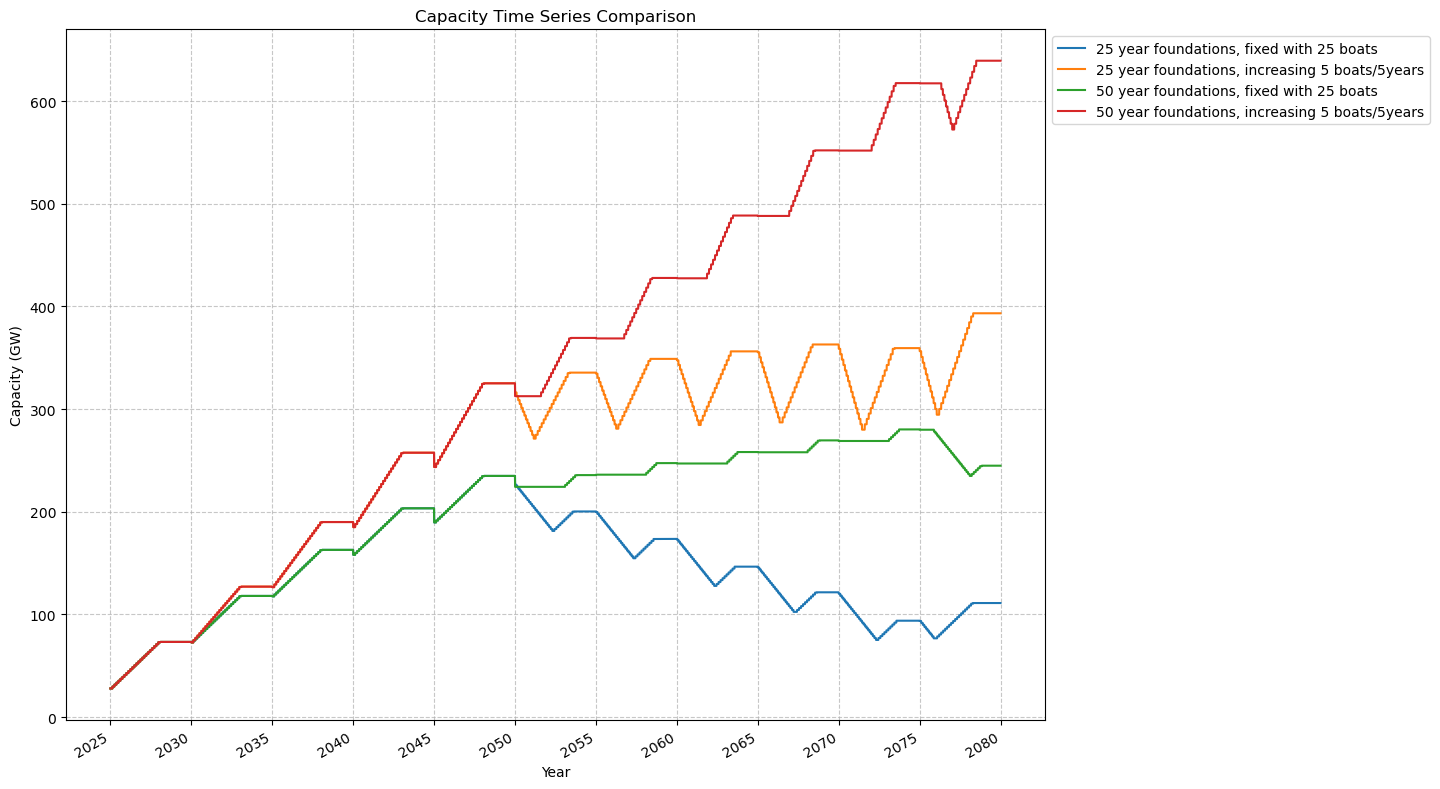

In [10]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime, timedelta
import numpy as np

def plot_multiple_capacity_time_series(data_dict):
    # Create dates for each data point, starting from Jan 1, 2020
    start_date = datetime(2025, 1, 1)
    dates = [start_date + timedelta(days=i) for i in range(len(next(iter(data_dict.values()))))]

    # Create the plot
    fig, ax = plt.subplots(figsize=(14, 8))

    # Plot each data series
    for label, data in data_dict.items():
        ax.plot(dates, data, label=label)

    # Set the x-axis to show years
    ax.xaxis.set_major_locator(mdates.YearLocator(5))
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

    # Rotate and align the tick labels so they look better
    fig.autofmt_xdate()

    # Add labels and title
    ax.set_xlabel('Year')
    ax.set_ylabel('Capacity (GW)')
    ax.set_title('Capacity Time Series Comparison')

    # Add gridlines
    ax.grid(True, linestyle='--', alpha=0.7)

    # Add legend
    ax.legend(loc='upper left', bbox_to_anchor=(1, 1))

    # Adjust layout to make room for the legend
    plt.tight_layout()
    plt.subplots_adjust(right=0.75)

    # Show the plot
    plt.show()

data_dict = {
    '25 year foundations, fixed with 25 boats': _25found25fixedboats,
    '25 year foundations, increasing 5 boats/5years': _25found_increasingboats5peryear,
    '50 year foundations, fixed with 25 boats': _50found25fixedboats,
    '50 year foundations, increasing 5 boats/5years': _50found_increasingboats5peryear
}

plot_multiple_capacity_time_series(data_dict)

In [7]:
capacity_tracker = {}

capacity_tracker['25foundation_25fixedboats'] = _25found25fixedboats
capacity_tracker['25foundation_increasingboats5peryear'] = _25found_increasingboats5peryear
capacity_tracker['50foundation_25fixedboats'] = _50found25fixedboats
capacity_tracker['50foundation_increasingboats5peryear'] = _50found_increasingboats5peryear